In [36]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [37]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/Align_press_CoM')

try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
  
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/BubComp')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/PhaseComp')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Grab the MCS data
pres5 = os.listdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/lat')
try:
    pres5.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [38]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [39]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       44186   -35.723259    -35.723259           0.0
1       0.1  5.016308       44132     7.715640      7.715640           0.0
2       0.2  5.016308       43964   -12.151856    -12.151856           0.0
3       0.3  5.016308       43789   -29.957608    -29.957608           0.0
4       0.4  5.016308       43569    -1.119222     -1.119222           0.0
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308        2479   -17.690721    -17.690721           0.0
1995  199.5  5.016308        4820   -25.221868    -25.221868           0.0
1996  199.6  5.016308        3117   -11.337870    -11.337870           0.0
1997  199.7  5.016308        4052    -9.565363     -9.565363           0.0
1998  199.8  5.016308        5245     9.865435      9.865435           0.0

[1999 rows x 6 columns]

In [40]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [41]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0       0.0  5.016308       44186   -35.723259    -35.723259           0.0
1       0.1  5.016308       44132     7.715640      7.715640           0.0
2       0.2  5.016308       43964   -12.151856    -12.151856           0.0
3       0.3  5.016308       43789   -29.957608    -29.957608           0.0
4       0.4  5.016308       43569    -1.119222     -1.119222           0.0
...     ...       ...         ...          ...           ...           ...
1994  199.4  5.016308        2479   -17.690721    -17.690721           0.0
1995  199.5  5.016308        4820   -25.221868    -25.221868           0.0
1996  199.6  5.016308        3117   -11.337870    -11.337870           0.0
1997  199.7  5.016308        4052    -9.565363     -9.565363           0.0
1998  199.8  5.016308        5245     9.865435      9.865435           0.0

[1999 rows x 6 columns]

5.016308
44186


In [42]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0          0.0  38381.575     9862.592    152.101    152.101    10318.796   
1          0.1  36123.238    21684.938    817.909    817.909    23515.910   
2          0.2  36370.918   104451.575   2761.070   2761.070    96464.338   
3          0.3  35956.848   161819.527   4238.347   4238.347   172504.913   
4          0.4  36264.225  1491470.253 -14080.718 -14080.718  1486793.267   
...        ...        ...          ...        ...        ...          ...   
1995     199.5  45645.598  1659751.019  -8428.356  -8428.356  1682936.783   
1996     199.6  45651.949  1676145.911  19076.724  19076.724  1680283.312   
1997     199.7  47799.783  2268071.921   4904.308   4904.308  2243903.184   
1998     199.8  49071.209  2318014.986   7275.387   7275.387  2371273.468   
1999     199.9  48748.589  2136037.560  20764.156  20764.156  2127607.561   

         gasTrace   bulkArea     bulkSigXX   bulkSigXY   bulkSigYX  \
0       10242.795  24733.749  3.933202e+07    4006.005    4006.005   
1       23418.333  22051.179  5.334925e+07 -269555.294 -269555.294   
2      103219.026  20631.145  6.336926e+07 -535473.386 -535473.386   
3      171400.567  20388.545  6.095477e+07 -318457.704 -318457.704   
4     1475051.042  19274.618  5.320333e+07  -84429.529  -84429.529   
...           ...        ...           ...         ...         ...   
1995  1662915.545  12875.572  6.173579e+07   38461.101   38461.101   
1996  1697291.335  12720.613  6.168982e+07 -547342.964 -547342.964   
1997  2260891.860  11798.480  6.246744e+07 -487395.005 -487395.005   
1998  2351919.614  11821.342  6.365627e+07 -179716.774 -179716.774   
1999  2152586.717  12093.156  6.042916e+07 -534569.051 -534569.051   

         bulkSigYY     bulkTrace  Length  NDense  
0     3.932479e+07  3.933241e+07   522.9   41926  
1     5.350413e+07  5.315713e+07  1724.3   41826  
2     6.264680e+07  6.247256e+07  1963.3   41482  
3     6.015813e+07  6.023799e+07  2098.5   41388  
4     5.260308e+07  5.281877e+07  2346.4   30502  
...            ...           ...     ...     ...  
1995  6.157083e+07  6.169177e+07  1876.5   27899  
1996  6.213688e+07  6.136601e+07  1993.7   27910  
1997  6.210735e+07  6.180000e+07  1597.0   25779  
1998  6.212950e+07  6.271317e+07  1205.9   24911  
1999  6.069669e+07  6.002836e+07  1273.5   25284  

[2000 rows x 15 columns]

In [43]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [44]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX  gasSigXY  gasSigYX     gasSigYY  \
0          0.0  38126.274     4699.041   303.766   303.766     4925.272   
1          0.1  36074.972     4496.723   216.597   216.597     4667.258   
2          0.2  35102.033     6567.078    67.293    67.293     6444.350   
3          0.3  34395.826     8594.106  -230.294  -230.294     9331.304   
4          0.4  33872.521    13952.027  -189.825  -189.825    13668.626   
...        ...        ...          ...       ...       ...          ...   
1994     199.5  59033.043  1744113.608  -984.143  -984.143  1748076.194   
1995     199.6  61297.731  1904666.835 -1729.633 -1729.633  1889687.842   
1996     199.7  59903.100  1805598.133 -3428.416 -3428.416  1807576.611   
1997     199.8  58320.485  1711992.417 -4018.583 -4018.583  1719138.971   
1998     199.9  60204.127  1842736.137 -3130.349 -3130.349  1840960.408   

         gasTrace   bulkArea     bulkSigXX  bulkSigXY  bulkSigYX  \
0        5115.923  24992.861  5.551827e+07  18205.748  18205.748   
1        4798.587  26863.800  3.800294e+07    186.047    186.047   
2        6573.008  27713.535  3.000804e+07 -14550.990 -14550.990   
3        8732.411  28302.887  2.501258e+07 -23224.772 -23224.772   
4       13620.502  28727.119  2.149773e+07 -26531.321 -26531.321   
...           ...        ...           ...        ...        ...   
1994  1745110.758   1606.747  1.752559e+05    562.669    562.669   
1995  1895447.705   1021.205  1.162115e+05   1381.828   1381.828   
1996  1803158.956   1237.132  1.354401e+05   2874.298   2874.298   
1997  1711547.111   1527.998  1.635070e+05   -159.708   -159.708   
1998  1838717.924   1173.624  1.246090e+05    329.026    329.026   

         bulkSigYY     bulkTrace  Length  NDense  
0     5.547844e+07  5.551656e+07   527.4   44186  
1     3.808158e+07  3.804245e+07   569.1   44132  
2     3.017208e+07  3.007551e+07   590.6   43964  
3     2.513417e+07  2.505015e+07   637.9   43789  
4     2.165053e+07  2.154760e+07   666.1   43569  
...            ...           ...     ...     ...  
1994  1.791119e+05  1.777465e+05  1249.9    4820  
1995  1.171513e+05  1.180632e+05   855.4    3117  
1996  1.341093e+05  1.376490e+05  1129.3    4052  
1997  1.615926e+05  1.623901e+05  1533.9    5245  
1998  1.198631e+05  1.225651e+05  1096.6    3873  

[1999 rows x 15 columns]

38126.274
4699.041


In [45]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb      radius  \
0       0.0  5.016308       41926       1       1   6704  17484   92.694940   
1       0.1  5.016308       41826       1       1   9755  18023  100.413626   
2       0.1  5.016308       41826       1       4    838      0   11.026093   
3       0.2  5.016308       41482       1       1  21269  18936  103.388040   
4       0.3  5.016308       41388       1       1  19832  19584   96.009764   
...     ...       ...         ...     ...     ...    ...    ...         ...   
2609  199.7  5.016308       25779       3       3  12753   7836   70.469940   
2610  199.7  5.016308       25779       3       2     51    121    6.474893   
2611  199.8  5.016308       24911       1       1  11958   6419   70.287964   
2612  199.8  5.016308       24911       1       2    415    829   18.946840   
2613  199.8  5.016308       24911       1       3     78    125    4.228003   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       1.743577  606.229500  430.731392   30.270313        4.416825   
1      29.119783  637.915973   83.353276   90.741686       30.169609   
2       1.153289   71.634138    0.000000    0.000000        0.000000   
3      24.882429  683.178443  126.039133   85.588550       25.674177   
4      37.566234  724.498526   47.874968   88.549102       37.712533   
...          ...         ...         ...         ...             ...   
2609   15.417144  516.004661  341.200963   27.780531       16.631513   
2610    2.161658   52.602555    0.000000    0.000000        0.000000   
2611   15.016663  517.042553  346.419340   28.340045       17.187140   
2612    9.453607  171.897878    0.000000    0.000000        0.000000   
2613    1.979017   36.508682    0.000000    0.000000        0.000000   

      edge_begin    edge_end  NBin  
0      62.424627   92.694940   716  
1       9.671941  100.413626   887  
2       0.000000    0.000000    26  
3      17.799490  103.388040  1320  
4       7.460662   96.009764  1408  
...          ...         ...   ...  
2609   42.689409   70.469940   617  
2610    0.000000    0.000000    15  
2611   41.950348   70.287964   516  
2612    0.000000    0.000000    54  
2613    0.000000    0.000000    10  

[2614 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [46]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [47]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id    Na     Nb      radius  \
0       0.0  5.016308       44186       1       1  6041  19616   93.479405   
1       0.1  5.016308       44132       1       1  5993  19982   97.259092   
2       0.2  5.016308       43964       1       1  6031  20184   99.353499   
3       0.3  5.016308       43789       1       1  5813  20286  100.707900   
4       0.4  5.016308       43569       2       2  5752  20415  102.062002   
...     ...       ...         ...     ...     ...   ...    ...         ...   
1797  101.7  5.016308       19386       3       3  1386   1326   40.990123   
1798  101.7  5.016308       19386       3       8  2162   1928   78.753196   
1799  101.7  5.016308       19386       3       9   863   1053   42.863829   
1800  101.7  5.016308       19386       3       1   985    419   29.668113   
1801  101.7  5.016308       19386       3      11   400    342    0.000000   

      radius_err       sa_ext      sa_int  edge_width  edge_width_err  \
0       2.047745   621.500129  410.666731   31.153988        3.634175   
1       2.003881   643.268098  418.462693   34.067747        2.869282   
2       1.990595   651.134446  420.496394   35.242013        3.305478   
3       2.316855   662.511403  435.872297   35.289580        3.025463   
4       3.174116   688.222844  435.639436   36.040669        3.031955   
...          ...          ...         ...         ...             ...   
1797    2.521539    31.362273    0.000000   40.990123        2.521539   
1798   31.897237  1028.738777    0.000000    0.000000        0.000000   
1799   16.722942   170.582960    0.000000   42.863829       16.722942   
1800   12.668320   325.519437    0.000000    0.000000        0.000000   
1801    0.000000     0.000000    0.000000    0.000000        0.000000   

      edge_begin    edge_end  NBin  
0      62.325417   93.479405   741  
1      63.191345   97.259092   818  
2      64.111486   99.353499   857  
3      65.418321  100.707900   872  
4      66.021333  102.062002   894  
...          ...         ...   ...  
1797    0.000000   40.990123   126  
1798    0.000000    0.000000   234  
1799    0.000000   42.863829    75  
1800    0.000000    0.000000   156  
1801    0.000000    0.000000    32  

[1802 rows x 16 columns]

5.016308
44186


In [48]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/PhaseComp')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  \
0       0.0  5.016308       41926    18269        0        436       0   
1       0.1  5.016308       41826    14325        1        346      55   
2       0.2  5.016308       41482     3561        0         84     143   
3       0.3  5.016308       41388     4297      341        110     844   
4       0.4  5.016308       30502     3197     5041        196    1629   
...     ...       ...         ...      ...      ...        ...     ...   
1994  199.4  5.016308       27261     4568     2143        135    6920   
1995  199.5  5.016308       27899     4955     2211        144    6869   
1996  199.6  5.016308       27910     5871     2528        170    7109   
1997  199.7  5.016308       25779     5075     2248        147    7094   
1998  199.8  5.016308       24911     5072     2136        145    7450   

      Nb_gas  NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0       7543      1449    6704   17484       716       0       0         0  
1       7003      1342    9755   18023       887     838       0        26  
2       6091      1197   21269   18936      1320       0       0         0  
3       5102      1083   19832   19584      1408       0       0         0  
4       4407       909   20147   15579      1496       0       0         0  
...      ...       ...     ...     ...       ...     ...     ...       ...  
1994   15411      1862   13485    7473       604       0       0         0  
1995   15026      1841   13059    7664       592      90     126        24  
1996   15276      1875   11993    7223       556       0       0         0  
1997   14822      1822   12753    7836       617      51     121        15  
1998   15518      1876   11958    6419       516     493     954        64  

[1999 rows x 15 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [49]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [50]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  \
0       0.0  5.016308       44186    18932        0        433       0   
1       0.1  5.016308       44132    18980        0        447       0   
2       0.2  5.016308       43964    18942        0        461       0   
3       0.3  5.016308       43789    19160       34        479       0   
4       0.4  5.016308       43569    19221        0        491       0   
...     ...       ...         ...      ...      ...        ...     ...   
1013  101.3  5.016308       19811      195      946         38    7484   
1014  101.4  5.016308       21782      395     1867         75   12010   
1015  101.5  5.016308       21825      383     2032         80   20188   
1016  101.6  5.016308       21182      454     2245         90   14589   
1017  101.7  5.016308       19386      373     2137         83   16960   

      Nb_gas  NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0       5411      1427    6041   19616       741       0       0         0  
1       5045      1336    5993   19982       818       0       0         0  
2       4843      1283    6031   20184       857       0       0         0  
3       4707      1250    5813   20286       872       0       0         0  
4       4612      1216    5752   20415       894       0       0         0  
...      ...       ...     ...     ...       ...     ...     ...       ...  
1013    6683       733   17294   17398      1830       0       0         0  
1014   11018      1202   11590   11385      1207     978     757       117  
1015   19086      2030     155     213        13    4247    3696       478  
1016   13761      1492    8106    7342       851    1824    1679       168  
1017   16224      1697    1386    1326       126    6254    5340       695  

[1018 rows x 15 columns]

5.016308
44186


In [51]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           2             1       0    0.000000   
1        0.0  5.016308           2             1       0    3.045615   
2        0.0  5.016308           2             1       0    6.091230   
3        0.0  5.016308           2             1       0    9.136846   
4        0.0  5.016308           2             1       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308         271             1       0  112.687764   
83954  199.8  5.016308         271             1       0  115.733379   
83955  199.8  5.016308         271             1       0  118.778994   
83956  199.8  5.016308         271             1       0  121.824610   
83957  199.8  5.016308         271             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615  0.059323  0.059323       NaN  1.853078   1.853078   
1        6.091230  0.024847  0.024847       NaN  1.658620   1.658620   
2        9.136846  0.054033  0.054033       NaN  1.606001   1.606001   
3       12.182461  0.015641  0.015641       NaN  1.647181   1.647181   
4       15.228076 -0.059294 -0.059294       NaN  1.670058   1.670058   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379 -0.019860 -0.038378 -0.010322  0.483173   0.164261   
83954  118.778994 -0.021988 -0.080758  0.009082  0.487113   0.168462   
83955  121.824610  0.002243  0.001425  0.002674  0.501713   0.172884   
83956  124.870225 -0.014544 -0.009788 -0.017024  0.493137   0.169039   
83957  127.915840 -0.031865 -0.014436 -0.040818  0.458102   0.155457   

       num_densB      press     pressA  pressB  
0       0.000000  54.965101  54.965101     0.0  
1       0.000000  20.605673  20.605673     0.0  
2       0.000000  43.388575  43.388575     0.0  
3       0.000000  12.881744  12.881744     0.0  
4       0.000000 -49.512474 -49.512474     0.0  
...          ...        ...        ...     ...  
83953   0.318913  -3.152029  -3.152029     0.0  
83954   0.318651  -6.802344  -6.802344     0.0  
83955   0.328828   0.123155   0.123155     0.0  
83956   0.324098  -0.827247  -0.827247     0.0  
83957   0.302645  -1.122085  -1.122085     0.0  

[83958 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [52]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [53]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

tauB   sizeBin  clust_size  interface_id  bub_id       r_min  \
0        0.0  5.016308           2             1       0    0.000000   
1        0.0  5.016308           2             1       0    3.045615   
2        0.0  5.016308           2             1       0    6.091230   
3        0.0  5.016308           2             1       0    9.136846   
4        0.0  5.016308           2             1       0   12.182461   
...      ...       ...         ...           ...     ...         ...   
83953  199.8  5.016308         461             1       0  112.687764   
83954  199.8  5.016308         461             1       0  115.733379   
83955  199.8  5.016308         461             1       0  118.778994   
83956  199.8  5.016308         461             1       0  121.824610   
83957  199.8  5.016308         461             1       0  124.870225   

            r_max     align    alignA    alignB  num_dens  num_densA  \
0        3.045615  0.011250  0.011250  0.000000  1.887395   1.887395   
1        6.091230  0.031826  0.031826  0.000000  1.647181   1.647181   
2        9.136846  0.054174  0.054174  0.000000  1.729540   1.729540   
3       12.182461  0.012351  0.012351  0.000000  1.794251   1.794251   
4       15.228076 -0.067366 -0.067366  0.000000  1.738691   1.738691   
...           ...       ...       ...       ...       ...        ...   
83953  115.733379 -0.005801  0.015579 -0.026886  0.787902   0.391205   
83954  118.778994 -0.020890 -0.031292 -0.009252  0.802644   0.423828   
83955  121.824610 -0.007231  0.014562 -0.029359  0.799265   0.402673   
83956  124.870225 -0.014060  0.010694 -0.037312  0.812575   0.393578   
83957  127.915840  0.008821  0.010416  0.007192  0.809947   0.409315   

       num_densB     press    pressA  pressB  
0       0.000000  1.061681  1.061681     0.0  
1       0.000000  2.621158  2.621158     0.0  
2       0.000000  4.684821  4.684821     0.0  
3       0.000000  1.108006  1.108006     0.0  
4       0.000000 -5.856431 -5.856431     0.0  
...          ...       ...       ...     ...  
83953   0.396696  0.304724  0.304724     0.0  
83954   0.378816 -0.663129 -0.663129     0.0  
83955   0.396592  0.293187  0.293187     0.0  
83956   0.418997  0.210441  0.210441     0.0  
83957   0.400632  0.213180  0.213180     0.0  

[83958 rows x 16 columns]

5.016308
2


In [54]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres5:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres5, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new4 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/passive_out_txt_files/lat')
for i in pres5:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new4.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new4[-1])
print(storeVals)

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0   0.0  5.016308       41926       0.834328      0.892428           0.0   

   lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0      0.867428      0.003064      0.21244          0.0      0.16292

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]]


In [55]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params6 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new4)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params6 = params6.append(df, ignore_index = True)
display(params6)

pe  peA peB    xA  eps   phi  tauPer_dt
0  0   50   0  50.0  1.0  60.0   0.000001
1  0  100   0  50.0  1.0  60.0   0.000001
2  0  150   0  50.0  1.0  60.0   0.000001
3  0  200   0  50.0  1.0  60.0   0.000001
4  0  250   0  50.0  1.0  60.0   0.000001
5  0  300   0  50.0  1.0  60.0   0.000001
6  0  350   0  50.0  1.0  60.0   0.000001
7  0  400   0  50.0  1.0  60.0   0.000001
8  0  450   0  50.0  1.0  60.0   0.000001
9  0  500   0  50.0  1.0  60.0   0.000001

In [56]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new4)):
    # Ger rid of NaN in favor of 0
    all_pres_new4[i].fillna(0, inplace=True)

headers=list(all_pres_new4[0])
display(all_pres_new4[0])
print(all_pres_new4[0][headers[1]][0])
print(all_pres_new4[0][headers[2]][0])

tauB   sizeBin  clust_size  lat_mean_bulk  lat_mean_int  lat_mean_bub  \
0   0.0  5.016308       28112       0.888695      1.026453           0.0   

   lat_mean_all  lat_std_bulk  lat_std_int  lat_std_bub  lat_std_all  
0      0.952205      0.004848     0.253858          0.0     0.185576

5.016308
28112


In [57]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [58]:



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

In [74]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

for i in range(0, len(all_dens)):
    #if (dens[i][0:4]=='rand'):# or (dens[i][0:4]=='fast'):
        #if (params['peA'][i]>=100) & (params['peB'][i]>=100):
            if all_dens[i].empty:
                continue

            for k in range(0, len(all_pres)):
                if all_pres[k].empty:
                    continue
                if params2['peA'][k]==params['peA'][i]:
                    if params2['peB'][k]==params['peB'][i]:

                        #if pres[k][0:4]==dens[i][0:4]:

                            for q in range(0, len(all_pres_new2)):

                                if all_pres_new2[q].empty:
                                    continue
                                #if pres3[q][0:4]==dens[i][0:4]:
                                if params4['peA'][q]==params['peA'][i]:
                                    if params4['peB'][q]==params['peB'][i]:
                                        for s in range(0, len(all_pres_new3)):

                                            if all_pres_new3[s].empty:
                                                continue
                                            if params5['peA'][s]==params['peA'][i]:
                                                if params5['peB'][s]==params['peB'][i]:
                                                    #if pres4[s][0:4]==dens[i][0:4]:
                                                        for t in range(0, len(all_pres_new)):
                                                            if all_pres_new[t].empty:
                                                                    continue
                                                            #if pres2[t][0:4]==dens[i][0:4]:
                                                            if params3['peA'][t]==params['peA'][i]:
                                                                if params3['peB'][t]==params['peB'][i]:
                                                                    for u in range(0, len(all_pres_new4)):
                                                                        if all_pres_new4[u].empty:
                                                                            continue
                                                                        if params6['peA'][u]==params['peA'][i]:
                                                                            if params6['peB'][u]==params['peB'][i]:
                                                                                #if pres5[u][0:4]==dens[i][0:4]:
                                                                                    print(pres5[u][0:4])
                                                                                    print(params['peA'][i])
                                                                                    print(params['peB'][i])
                                                                                    time_i = all_dens[i]['tauB']
                                                                                    time_k = all_pres[k]['Timestep']
                                                                                    time_q = all_pres_new2[q]['tauB']
                                                                                    time_s = all_pres_new3[s]['tauB']
                                                                                    time_t = all_pres_new[t]['tauB']
                                                                                    time_u = all_pres_new4[u]['tauB']

                                                                                    #Instantiate arrays for reading in interface pressure .txt file
                                                                                    final_time_i =np.array([])
                                                                                    final_align_press = np.array([])
                                                                                    align_press_total = 0
                                                                                    align_press_vals=0

                                                                                    #Instantiate arrays for reading in bulk pressure .txt file
                                                                                    bulk_time =np.array([])
                                                                                    bulk_press_time = np.array([])
                                                                                    bulk_press_total = 0
                                                                                    bulk_press_total_expand = 0
                                                                                    bulk_press_vals=0
                                                                                    shear_press_expand=0

                                                                                    #Instantiate arrays for reading in number density .txt file
                                                                                    bulk_nA_arr = np.array([])
                                                                                    bulk_nB_arr = np.array([])
                                                                                    bulk_n_arr = np.array([])
                                                                                    int_n_arr = np.array([])
                                                                                    int_nA_arr = np.array([])
                                                                                    int_nB_arr = np.array([])
                                                                                    gas_nA_arr = np.array([])
                                                                                    gas_n_arr = np.array([])
                                                                                    gas_nB_arr = np.array([])
                                                                                    dense_nA_arr = np.array([])
                                                                                    dense_nB_arr = np.array([])
                                                                                    dense_n_arr = np.array([])

                                                                                    #Instantiate arrays for reading in lattice spacing .txt file
                                                                                    bulk_lat_mean = np.array([])
                                                                                    int_lat_mean = np.array([])
                                                                                    all_lat_mean = np.array([])
                                                                                    bulk_lat_std = np.array([])
                                                                                    int_lat_std = np.array([])
                                                                                    all_lat_std = np.array([])

                                                                                    #Instantiate arrays for reading in radial measurement .txt file
                                                                                    num_dens_arr_temp = np.zeros(50)
                                                                                    align_arr_temp = np.zeros(50)
                                                                                    press_arr_temp = np.zeros(50)
                                                                                    xA_arr_temp = np.zeros(50)
                                                                                    xB_arr_temp = np.zeros(50)
                                                                                    temp_count = np.zeros(50)
                                                                                    temp_count_count = np.zeros(50)

                                                                                    radius_arr_final = np.linspace(0,1.6,num=50)
                                                                                    num_dens_arr_final = np.zeros(50)
                                                                                    align_arr_final = np.zeros(50)
                                                                                    xA_arr_final = np.zeros(50)
                                                                                    xB_arr_final = np.zeros(50)
                                                                                    press_arr_final = np.zeros(50)
                                                                                    final_count = np.zeros(50)
                                                                                    final_count_count = np.zeros(50)

                                                                                    press_theory_time = np.array([])
                                                                                    press_theory_val = np.array([])
                                                                                    time_arr = np.array([])

                                                                                    bub_width_arr = np.array([])
                                                                                    bub_area_arr = np.array([])
                                                                                    bub_surface_area_arr = np.array([])
                                                                                    int_width_arr = np.array([])
                                                                                    clust_arr = np.array([])

                                                                                    time_dens = np.array([])
                                                                                    time_width = np.array([])
                                                                                    #Loop over time in interface pressure .txt file
                                                                                    for j in range(0, len(time_i)):

                                                                                        #Current time in loop
                                                                                        time = time_i[j]
                                                                                        if time <=0.3:

                                                                                            #Read values and set variables from interface pressure .txt file
                                                                                            align_press = all_dens[i]['press_align'][j]

                                                                                            if align_press > 0:
                                                                                                final_time_i = np.append(final_time_i, all_dens[i]['tauB'].iloc[j])
                                                                                                final_align_press = np.append(final_align_press, align_press)

                                                                                                align_press_total += align_press
                                                                                                align_press_vals += 1

                                                                                            #Read values and set variables from bulk pressure.txt files

                                                                                            time_id_k = np.where(time_k==time)[0]
                                                                                            if len(time_id_k)>0:
                                                                                                time_id_k=time_id_k[0]

                                                                                                bulk_trace = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2


                                                                                                bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2
                                                                                                bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                shear_stress = (all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k])/2
                                                                                                shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[time_id_k])
                                                                                                if bulk_press>0:
                                                                                                    bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[time_id_k])
                                                                                                    bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                                                                                    shear_press_expand +=shear_press
                                                                                                    bulk_press_total += bulk_press
                                                                                                    bulk_press_total_expand += bulk_press_expand
                                                                                                    bulk_press_vals += 1

                                                                                            #Read values and set variables from number density .txt files
                                                                                            time_id_q = np.where(time_q==time)[0]
                                                                                            if len(time_id_q)>0:
                                                                                                time_dens = np.append(time_dens, time)
                                                                                                bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                                                bin_area = bin_size**2
                                                                                                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                                            #Read values and set variables from lattice spacing .txt files

                                                                                            time_id_u = np.where(time_u==time)[0]
                                                                                            if len(time_id_u)>0:
                                                                                                time_id_u = time_id_u[0]
                                                                                                bulk_lat_mean = np.append(bulk_lat_mean, all_pres_new4[u]['lat_mean_bulk'][time_id_u])
                                                                                                bulk_lat_std = np.append(bulk_lat_std, all_pres_new4[u]['lat_std_bulk'][time_id_u])
                                                                                                int_lat_mean = np.append(int_lat_mean, all_pres_new4[u]['lat_mean_int'][time_id_u])
                                                                                                int_lat_std = np.append(int_lat_std, all_pres_new4[u]['lat_std_int'][time_id_u])
                                                                                                all_lat_mean = np.append(all_lat_mean, all_pres_new4[u]['lat_mean_all'][time_id_u])
                                                                                                all_lat_std = np.append(all_lat_std, all_pres_new4[u]['lat_std_all'][time_id_u])


                                                                                            #Read values and set variables from radial measurement .txt files
                                                                                            time_id_s = np.where(time_s==time)[0]
                                                                                            time_id_t = np.where(time_t==time)[0]

                                                                                            max_size = np.amax(all_pres_new[t]['clust_size'])
                                                                                            if len(time_id_t)>0:
                                                                                                for z in range(0, len(time_id_t)):
                                                                                                    #if all_pres_new[t]['clust_size'][time_id_t[z]]>=0.95*max_size:
                                                                                                    if all_pres_new[t]['int_id'][time_id_t[z]] == all_pres_new[t]['bub_id'][time_id_t[z]]:
                                                                                                        time_width = np.append(time_width, time)
                                                                                                        bub_width_arr = np.append(bub_width_arr, all_pres_new[t]['radius'][time_id_t[z]])
                                                                                                        bub_surface_area_arr = np.append(bub_surface_area_arr, all_pres_new[t]['sa_ext'][time_id_t[z]])
                                                                                                        int_width_arr = np.append(int_width_arr, all_pres_new[t]['edge_width'][time_id_t[z]])
                                                                                                        clust_arr = np.append(clust_arr, all_pres_new[t]['clust_size'][time_id_t[z]])
                                                                                                avg_rad_temp = np.mean(bub_width_arr)
                                                                                                uncertain = np.where(((0.9*avg_rad_temp)<=bub_width_arr) & (bub_width_arr<=(1.1*avg_rad_temp)))[0]
                                                                                                bub_width_arr = bub_width_arr[uncertain]
                                                                                                time_width = time_width[uncertain]
                                                                                                bub_surface_area_arr = bub_surface_area_arr[uncertain]
                                                                                                int_width_arr = int_width_arr[uncertain]
                                                                                                clust_arr = clust_arr[uncertain]

                                                              

                                                                                    #Time-average values for sufficiently long interface pressure .txt files
                                                                                    if align_press_vals > 0:        
                                                                                        avg_press = (align_press_total/align_press_vals)
                                                                                        align_press_arr = np.append(align_press_arr, avg_press)
                                                                                        align_peA=np.append(align_peA, params['peA'][i])
                                                                                        align_peB=np.append(align_peB, params['peB'][i])
                                                                                        align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                                                                                        align_xA=np.append(align_xA, params['xA'][i])
                                                                                        align_phi=np.append(align_phi, params['phi'][i])
                                                                                        align_eps=np.append(align_eps, params['eps'][i])
                                                                                        if dens[i][0:4]=='fast':
                                                                                            align_type = np.append(align_type, 0)
                                                                                        elif dens[i][0:4]=='rand':
                                                                                            align_type = np.append(align_type, 1)
                                                                                        elif dens[i][0:4]=='slow':
                                                                                            align_type = np.append(align_type, 2)

                                                                                    #Time-average values for sufficiently long bulk pressure .txt files
                                                                                    if bulk_press_vals > 0:        
                                                                                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                                                                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                                                                                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                                                                        interpart_press=np.append(interpart_press, avg_press)
                                                                                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                                                                        interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                                                                        interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                                                                        interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                        interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                                                                        interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                                                                        interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                                                                        if dens[i][0:4]=='fast':
                                                                                            interpart_type = np.append(interpart_type, 0)
                                                                                        elif dens[i][0:4]=='rand':
                                                                                            interpart_type = np.append(interpart_type, 1)
                                                                                        elif dens[i][0:4]=='slow':
                                                                                            interpart_type = np.append(interpart_type, 2)
                                                                                    #Time-average values for sufficiently long bubble composition .txt files
                                                                                    
                                                                                    print(len(bub_width_arr))
                                                                                    if len(bub_width_arr)>0:
                                                                                        width_peA=np.append(width_peA, params2['peA'][k])
                                                                                        width_peB=np.append(width_peB, params2['peB'][k])
                                                                                        width_peNet=np.append(width_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                        width_xA=np.append(width_xA, params2['xA'][k])
                                                                                        width_phi=np.append(width_phi, params2['phi'][k])
                                                                                        width_eps=np.append(width_eps, params2['eps'][k])
                                                                                        nonzero = np.where(bub_surface_area_arr>0)[0]

                                                                                        avg_rad = np.append(avg_rad, np.mean(bub_width_arr[nonzero]))
                                                                                        avg_circularity = np.append(avg_circularity, np.mean((np.pi*(bub_width_arr[nonzero]**2)*4*np.pi)/bub_surface_area_arr[nonzero]**2))
                                                                                        avg_width = np.append(avg_width, np.mean(int_width_arr[nonzero]))
                                                                                        avg_clust = np.append(avg_clust, np.mean(clust_arr[nonzero]))
                                                                                        if dens[i][0:4]=='fast':
                                                                                            width_type = np.append(width_type, 0)
                                                                                        elif dens[i][0:4]=='rand':
                                                                                            width_type = np.append(width_type, 1)
                                                                                        elif dens[i][0:4]=='slow':
                                                                                            width_type = np.append(width_type, 2)

                                                                                    bulk_lat_time_mean = np.append(bulk_lat_time_mean, np.mean(bulk_lat_mean))
                                                                                    int_lat_time_mean = np.append(int_lat_time_mean, np.mean(int_lat_mean))
                                                                                    all_lat_time_mean = np.append(all_lat_time_mean, np.mean(all_lat_mean))

                                                                                    bulk_lat_time_std = np.append(bulk_lat_time_std, np.mean(bulk_lat_std))
                                                                                    int_lat_time_std = np.append(int_lat_time_std, np.mean(int_lat_std))
                                                                                    all_lat_time_std = np.append(all_lat_time_std, np.mean(all_lat_std))

                                                                                    #Time-average values for sufficiently long phase composition .txt files
                                                                                    avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                                                                    avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                                                                    avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))


                                                                                    avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
                                                                                    avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                                                                    avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))

                                                                                    avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
                                                                                    avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                                                                    avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))

                                                                                    avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                                                                    avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                                                                    avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

                                                                                    for m in range(0, len(align_arr_temp)):
                                                                                        if temp_count[m]>0:
                                                                                            align_arr_final[m]=align_arr_final[m]/final_count[m]
                                                                                            num_dens_arr_final[m]=num_dens_arr_final[m]/final_count[m]
                                                                                            xA_arr_final[m]=xA_arr_final[m]/final_count[m]
                                                                                            xB_arr_final[m]=xB_arr_final[m]/final_count[m]

                                                                                    peNet_int = (int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])
                                                                                    peNet_dense = (dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])
                                                                                    peNet_bulk = (bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])

                                                                                    

                                                                                    fsize=10
                                                                                    mpl.rcParams.update({'font.size': 13})
                                                                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                                    msz=40
                                                                                    yellow = ("#fec44f")
                                                                                    green = ("#77dd77")
                                                                                    red = ("#ff6961")

                                                                                    dens_sim2 = clust_arr * (np.pi/4) / (np.pi * bub_width_arr**2)


                                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                    nonzero_align = np.where(final_align_press>0)[0]

                                                                                    if len(nonzero_bulk)>10:
                                                                                        if len(nonzero_align)>10:
                                                                                            fastSim = '#de2d26'
                                                                                            fastTheory = '#fc9272'
                                                                                            slowSim = '#3182bd'
                                                                                            slowTheory = '#9ecae1'
                                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                            plot_max = np.max(bulk_press_time)+200


                                                                                            plot_min = np.min(bulk_press_time)-200
                                                                                            step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                            if step < 0:
                                                                                                step = step * -1


                                                                                            plt.plot(bulk_time, bulk_press_time,
                                                                                                           c=slowTheory, lw=1.8*1.8, ls='--')

                                                                                            ax1.set_xlim(0, 100)        
                                                                                            # y limits


                                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                            ax1.set_ylabel(r'$\Pi_\mathrm{d}^\mathrm{P}$', fontsize=fsize*2.8)


                                                                                            # Set all the x ticks for radial plots
                                                                                            loc = ticker.MultipleLocator(base=30)
                                                                                            ax1.xaxis.set_major_locator(loc)
                                                                                            loc = ticker.MultipleLocator(base=15)
                                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                                            # Set y ticks
                                                                                            print(step)
                                                                                            loc = ticker.MultipleLocator(base=step)
                                                                                            ax1.yaxis.set_major_locator(loc)
                                                                                            loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                                            # Left middle plot
                                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                            plt.tight_layout()
                                                                                            plt.savefig('/Volumes/External/txt_files/passive_out_txt_files/press_time_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                            plt.close()
                                            

                                                                                            avg_bulk_theory_arr = np.append(avg_bulk_theory_arr, np.mean(theoryss))
                                                                                            avg_int_theory_arr = np.append(avg_int_theory_arr, np.mean(press_theory_val))

        




lat_
50
0
4
lat_
100
0
4
lat_
150
0
4
lat_
200
0
4
lat_
250
0
4
lat_
300
0
4
lat_
350
0
4
lat_
400
0
4
lat_
450
0
4
lat_
500
0
4


In [75]:

import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

lat_theory_mean_int = np.zeros(len(interpart_peNet))
lat_theory_mean_bulk = np.zeros(len(interpart_peNet))

lat_theory_mean_dense = np.zeros(len(interpart_peNet))

gas_pe_net = np.zeros(len(interpart_peNet))

dense_pe_net = np.zeros(len(interpart_peNet))
bulk_pe_net = np.zeros(len(interpart_peNet))
int_pe_net = np.zeros(len(interpart_peNet))
pe_dif_arr = np.zeros(len(interpart_peNet))

beta_theory = np.zeros(len(interpart_peNet))
beta_theory2 = np.zeros(len(interpart_peNet))

beta_theory3 = np.zeros(len(interpart_peNet))
beta_theory4 = np.zeros(len(interpart_peNet))

phi_gas_sim = np.zeros(len(interpart_peNet))



avg_area2 = np.zeros(len(interpart_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
phi_cp = np.pi / (2*np.sqrt(3))
area_box = (50000 * (np.pi/4))/0.6


int_pe_net_theory = np.linspace(50, 500, num=451)

phi_gas_theory2 = np.zeros(len(int_pe_net_theory))
phi_dense_theory2 = np.zeros(len(int_pe_net_theory))
clust_theory2 = np.zeros(len(int_pe_net_theory))
rad_theory2 = np.zeros(len(int_pe_net_theory))
press_theory2 = np.zeros(len(int_pe_net_theory))
width_theory2 = np.zeros(len(int_pe_net_theory))

lat_theory_mean_int_theory = np.zeros(len(int_pe_net_theory))


phi_gas_theory3 = np.zeros(len(interpart_peNet))
phi_gas_theory4 = np.zeros(len(interpart_peNet))
phi_gas_theory5 = np.zeros(len(interpart_peNet))
phi_gas_theory6 = np.zeros(len(interpart_peNet))
phi_gas_theory7 = np.zeros(len(interpart_peNet))

phi_gas_theory = np.zeros(len(interpart_peNet))
phi_dense_theory = np.zeros(len(interpart_peNet))
clust_theory = np.zeros(len(interpart_peNet))
rad_theory = np.zeros(len(interpart_peNet))
press_theory = np.zeros(len(interpart_peNet))
#lat_theory_mean_int_theory = np.zeros(len(interpart_peNet))

for p in range(0, len(interpart_peNet)):
    gas_pe_net[p]=(((avg_gas_nA[p]/avg_gas_n[p]) * interpart_peA[p] + (avg_gas_nB[p]/avg_gas_n[p]) * interpart_peB[p]))
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * interpart_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * interpart_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * interpart_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * interpart_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * interpart_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * interpart_peB[p]))
    pe_dif_arr[p] = np.abs(interpart_peB[p] - interpart_peA[p])
    
    
radius_arr_temp = np.linspace(0, 1.6, num=60)
int_pe_net_theory_min_arr = np.array([])
int_pe_net_theory_max_arr = np.array([])

press_theory_val_min = np.array([])
press_theory_val_max = np.array([])

int_pe_net_theory2 = np.linspace(50, 500, num=91)
press_theory_val_arr = np.array([])

int_pe_net_theory_arr = np.array([])



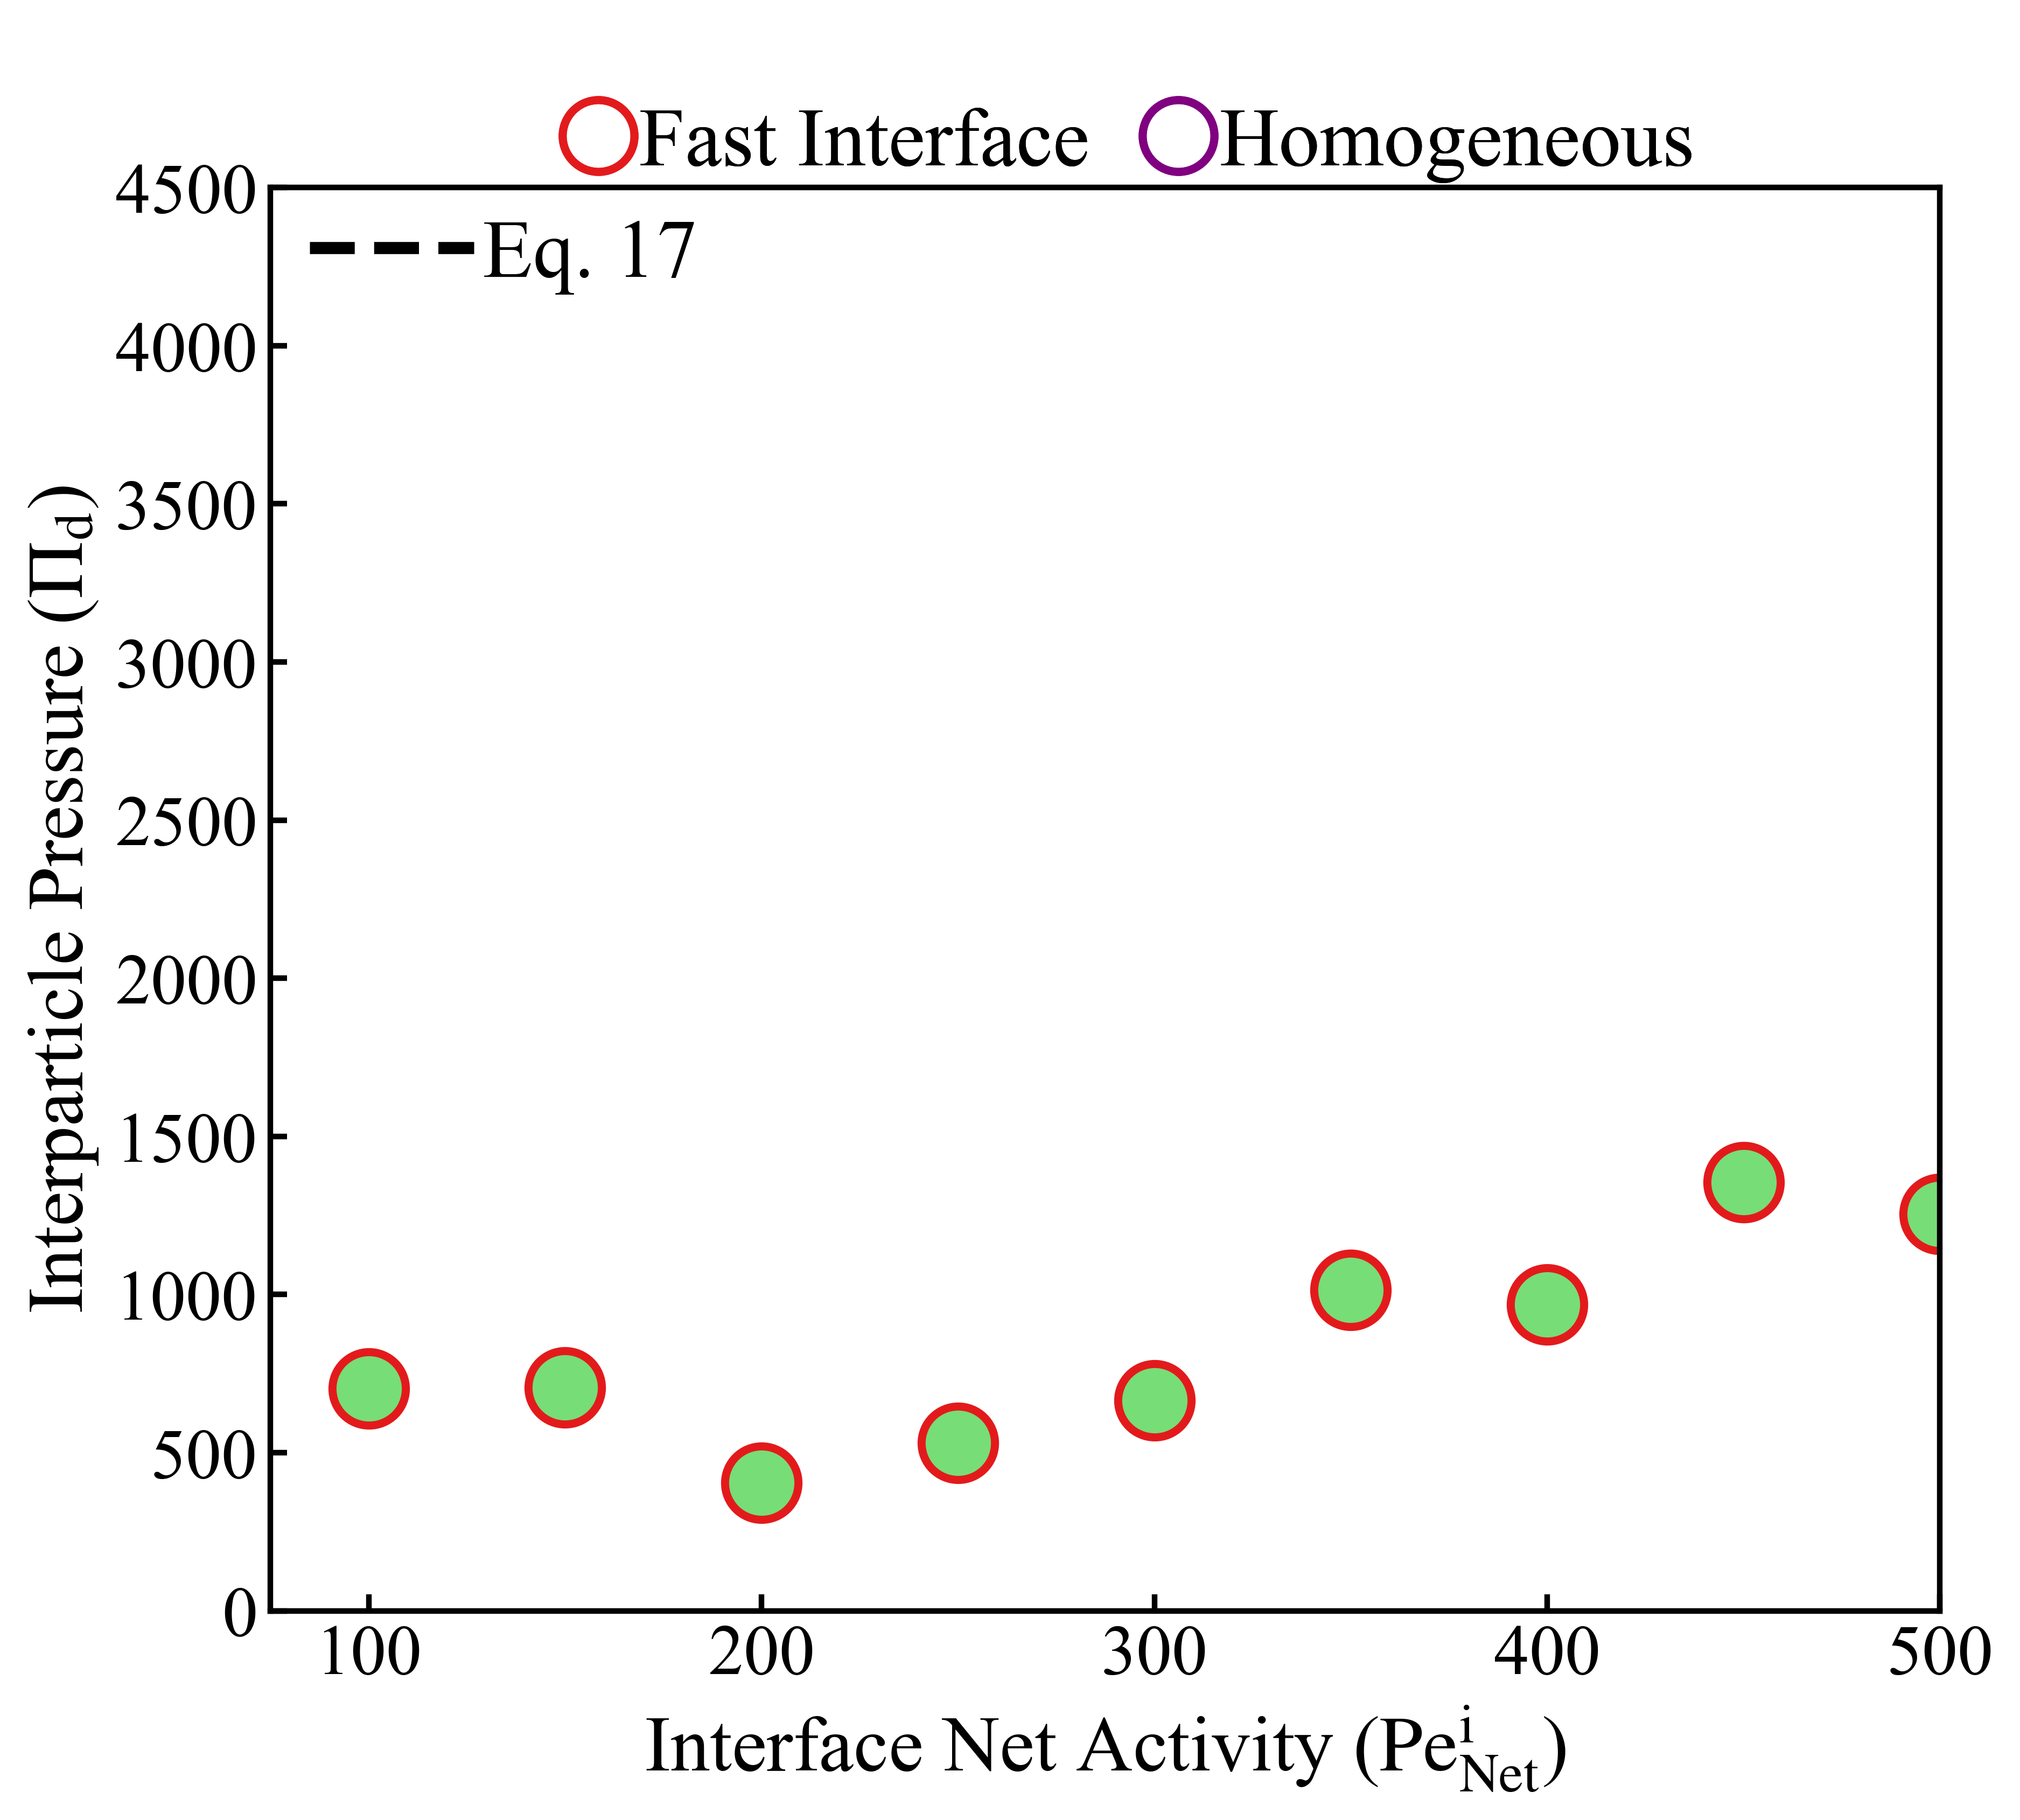

NameError: name 'stop' is not defined

In [76]:

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(interpart_peA, interpart_press, edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[rand], interpart_press[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interparticle Pressure ($\Pi_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

stop
fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], avg_width[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 36])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()


In [25]:

for x in range(0, len(int_pe_net_theory2)):
    print(x)
    for y in range(0, len(int_pe_net_theory2)):
        if int_pe_net_theory2[x]<= int_pe_net_theory2[y]:
            int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])+1))
            
            for z in range(0, len(int_pe_net_theory_temp)):
                
                lat_theory_mean_int_val = conForRClust(int_pe_net_theory_temp[z]-50, 1.0)
                phi_dense_val = phi_cp / lat_theory_mean_int_val**2 
                phi_gas_val = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_val * int_pe_net_theory_temp[z]) ** (-1))

                clust_val = 50000* (((phi_gas_val-0.6)*phi_dense_val)/(0.6*(phi_gas_val-phi_dense_val)))
                press_val = (int_pe_net_theory_temp[z]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_val
                rad_val =  ((clust_val / (4*phi_cp))**0.5) * lat_theory_mean_int_val
                width_val = (np.sqrt(3)/(2*0.5)) * (press_val/int_pe_net_theory_temp[z]) * lat_theory_mean_int_val**2 * 3.0
                peNet = 0.5 * float(int_pe_net_theory2[x]) + 0.5 * float(int_pe_net_theory2[y])
                #int_pe_net_val = 

                dens_temp = densProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])
                align_temp = alignProbability(radius_arr_temp, peNet, int_pe_net_theory2[x])

                press = dens_temp * align_temp * int_pe_net_theory_temp[z]
                press_int = 0
                for m in range(1, len(press)):
                    press_int += ((press[m-1]+press[m])/2)*(radius_arr_temp[m]-radius_arr_temp[m-1]) * rad_val
                press_theory_val_arr = np.append(press_theory_val_arr, press_int)
                int_pe_net_theory_arr = np.append(int_pe_net_theory_arr, int_pe_net_theory_temp[z])

int_pe_net_final_arr = np.array([])
press_theory_max_arr = np.array([])
press_theory_min_arr = np.array([])
for z in range(0, len(int_pe_net_theory_arr)):
    if int_pe_net_theory_arr[z] not in int_pe_net_final_arr:
        loc = np.where(int_pe_net_theory_arr==int_pe_net_theory_arr[z])[0]
        press_theory_max_arr = np.append(press_theory_max_arr, np.max(press_theory_val_arr[loc]))
        press_theory_min_arr = np.append(press_theory_min_arr, np.min(press_theory_val_arr[loc]))
        int_pe_net_final_arr = np.append(int_pe_net_final_arr, int_pe_net_theory_arr[z])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


74
74


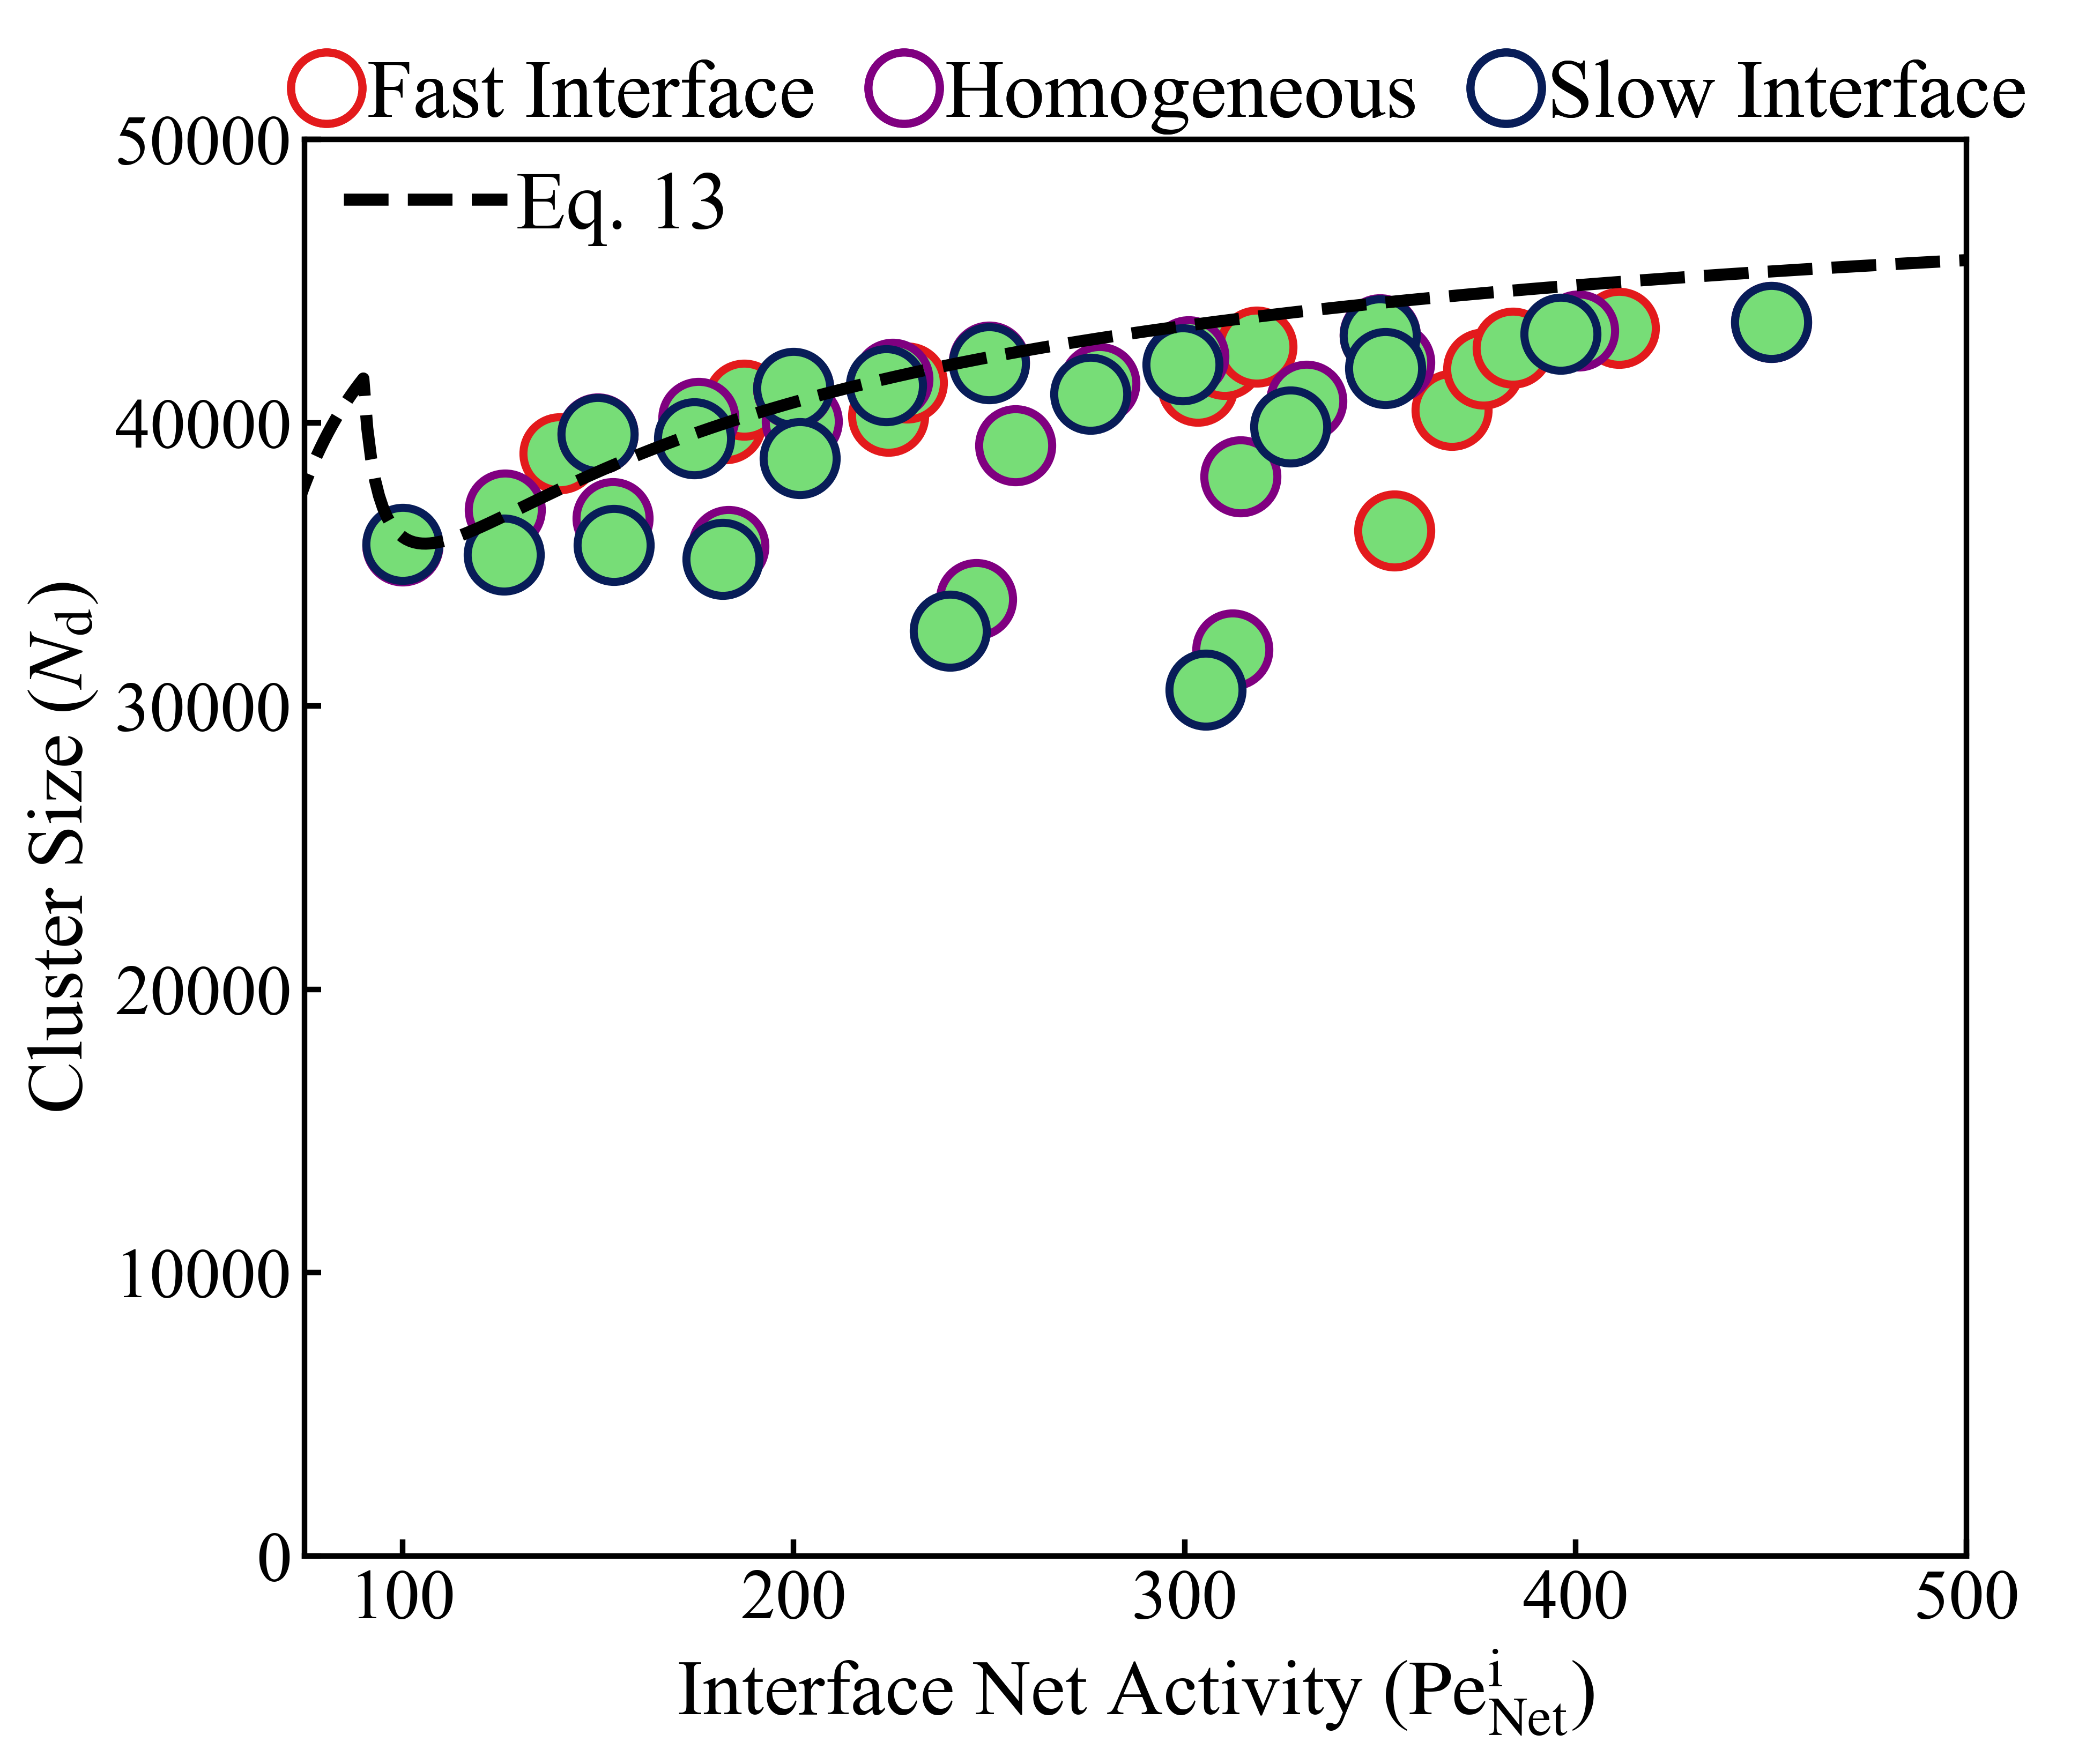

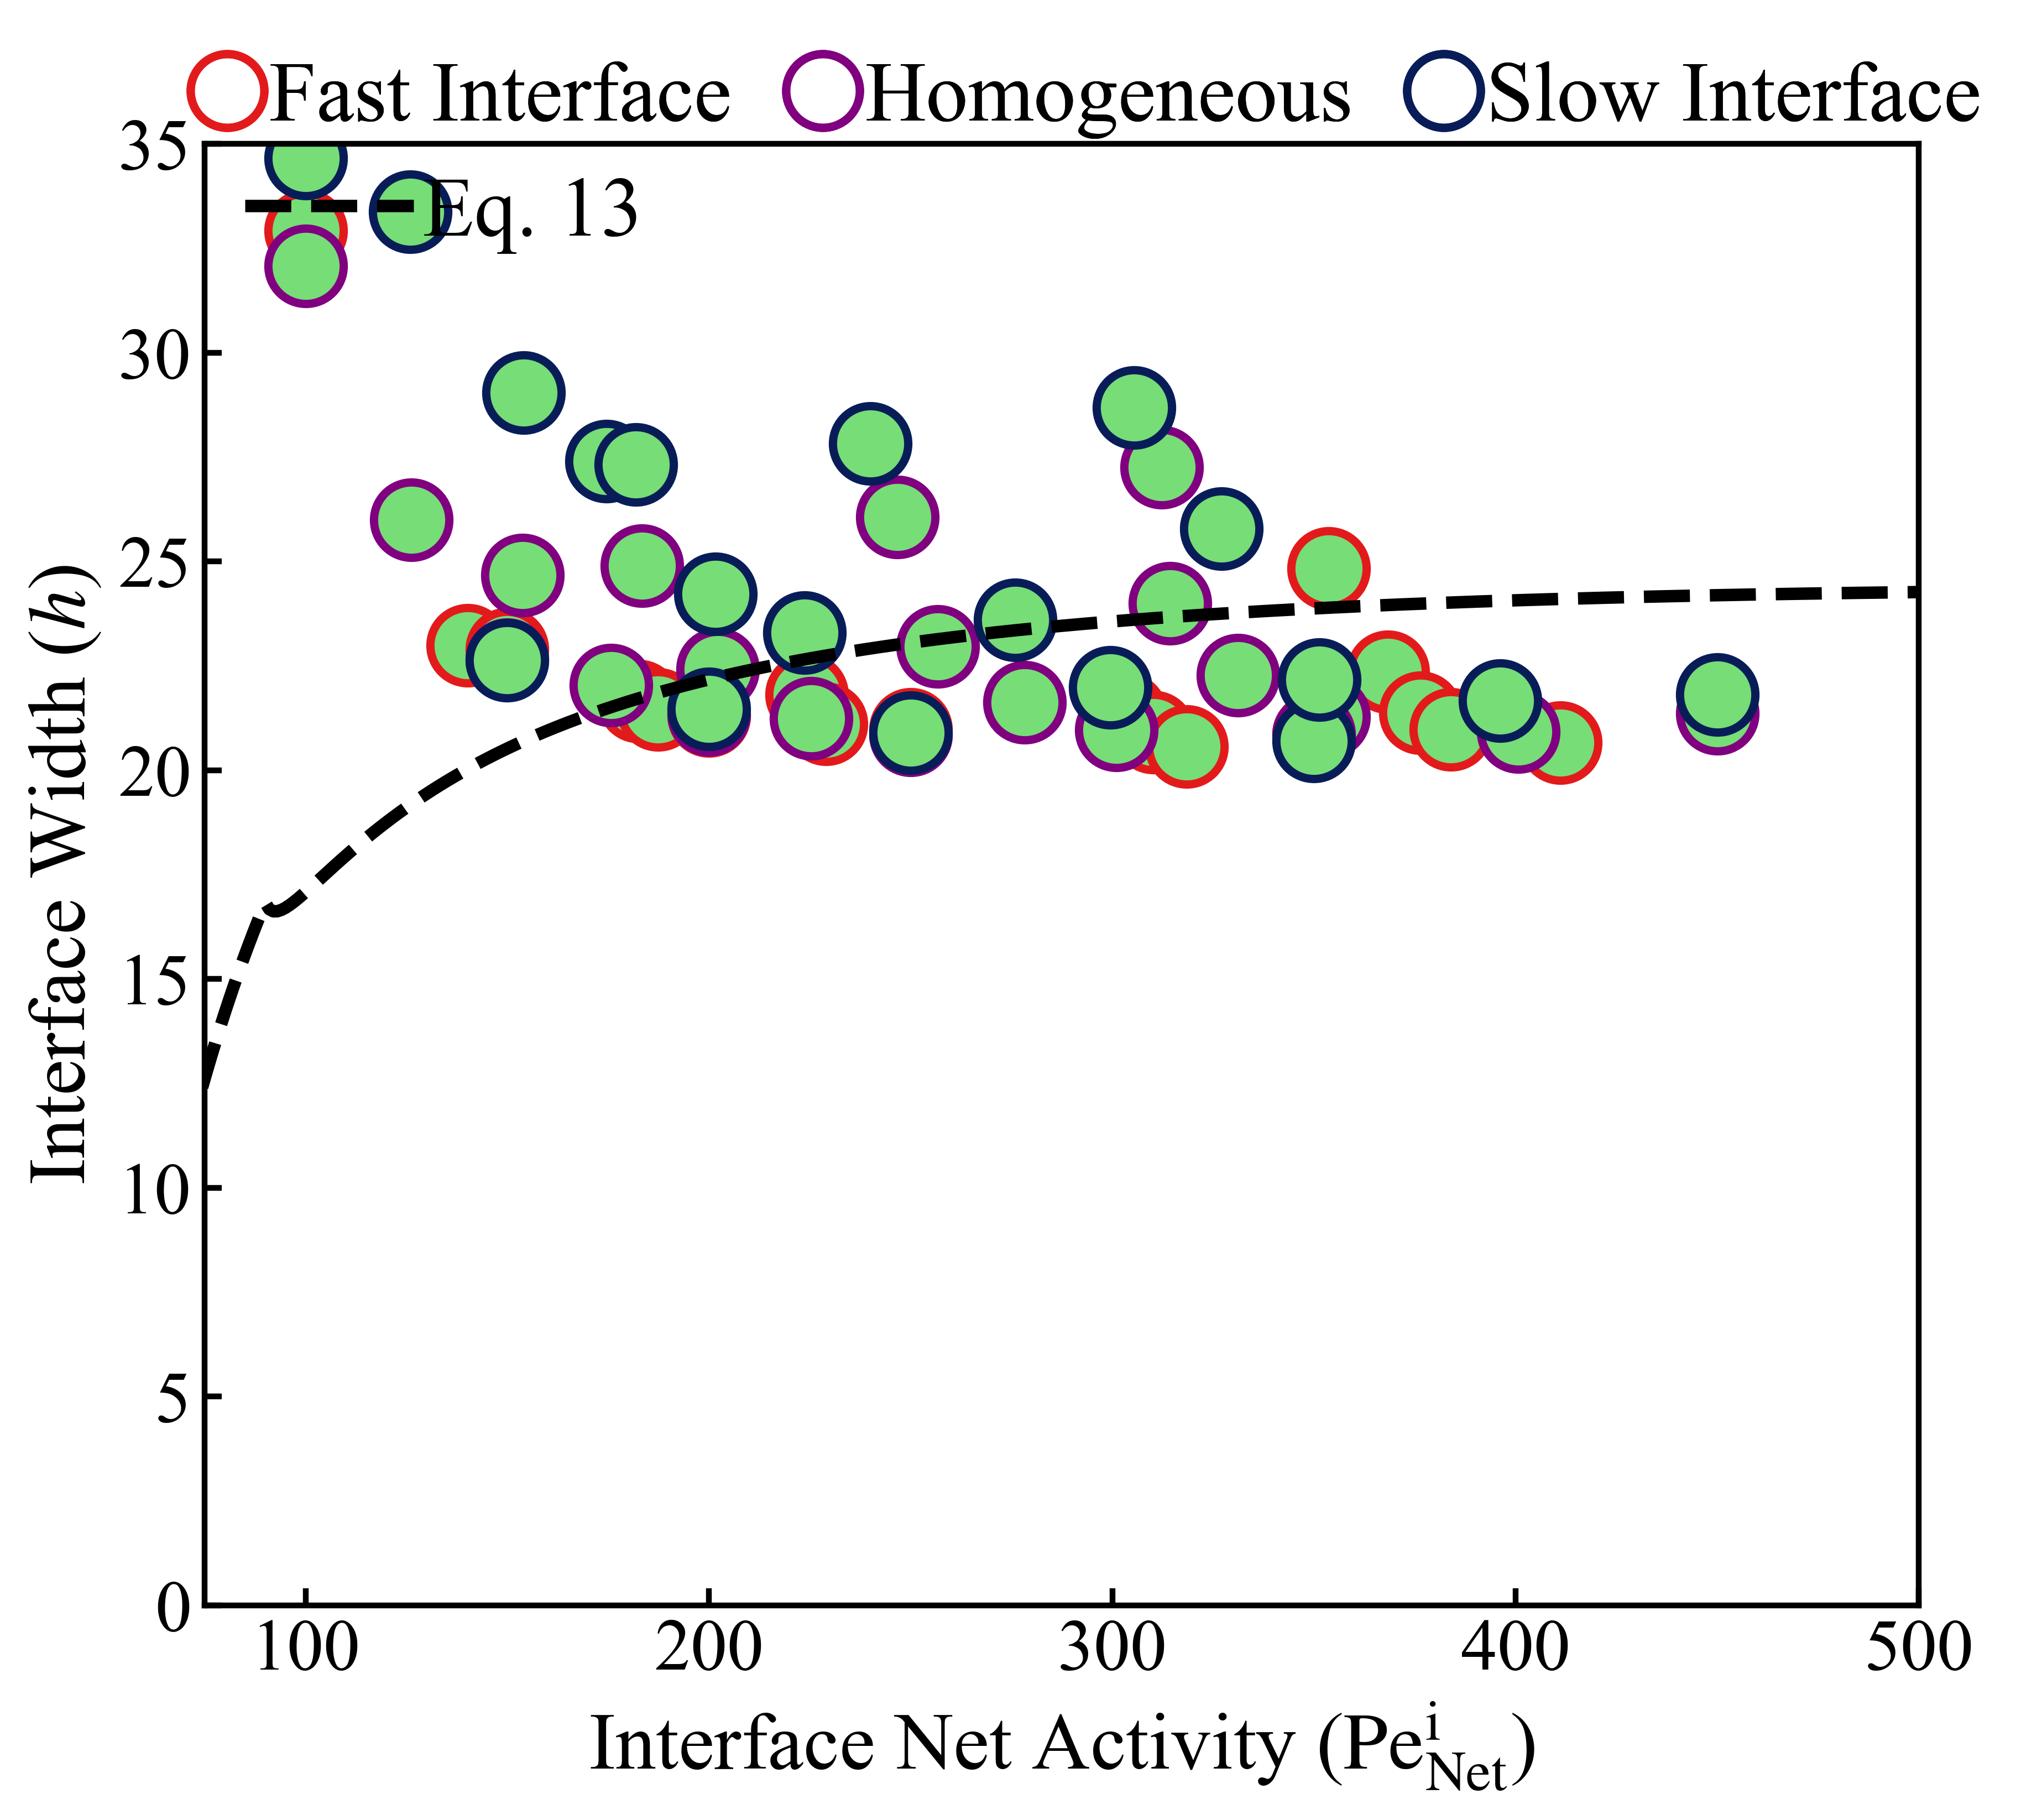

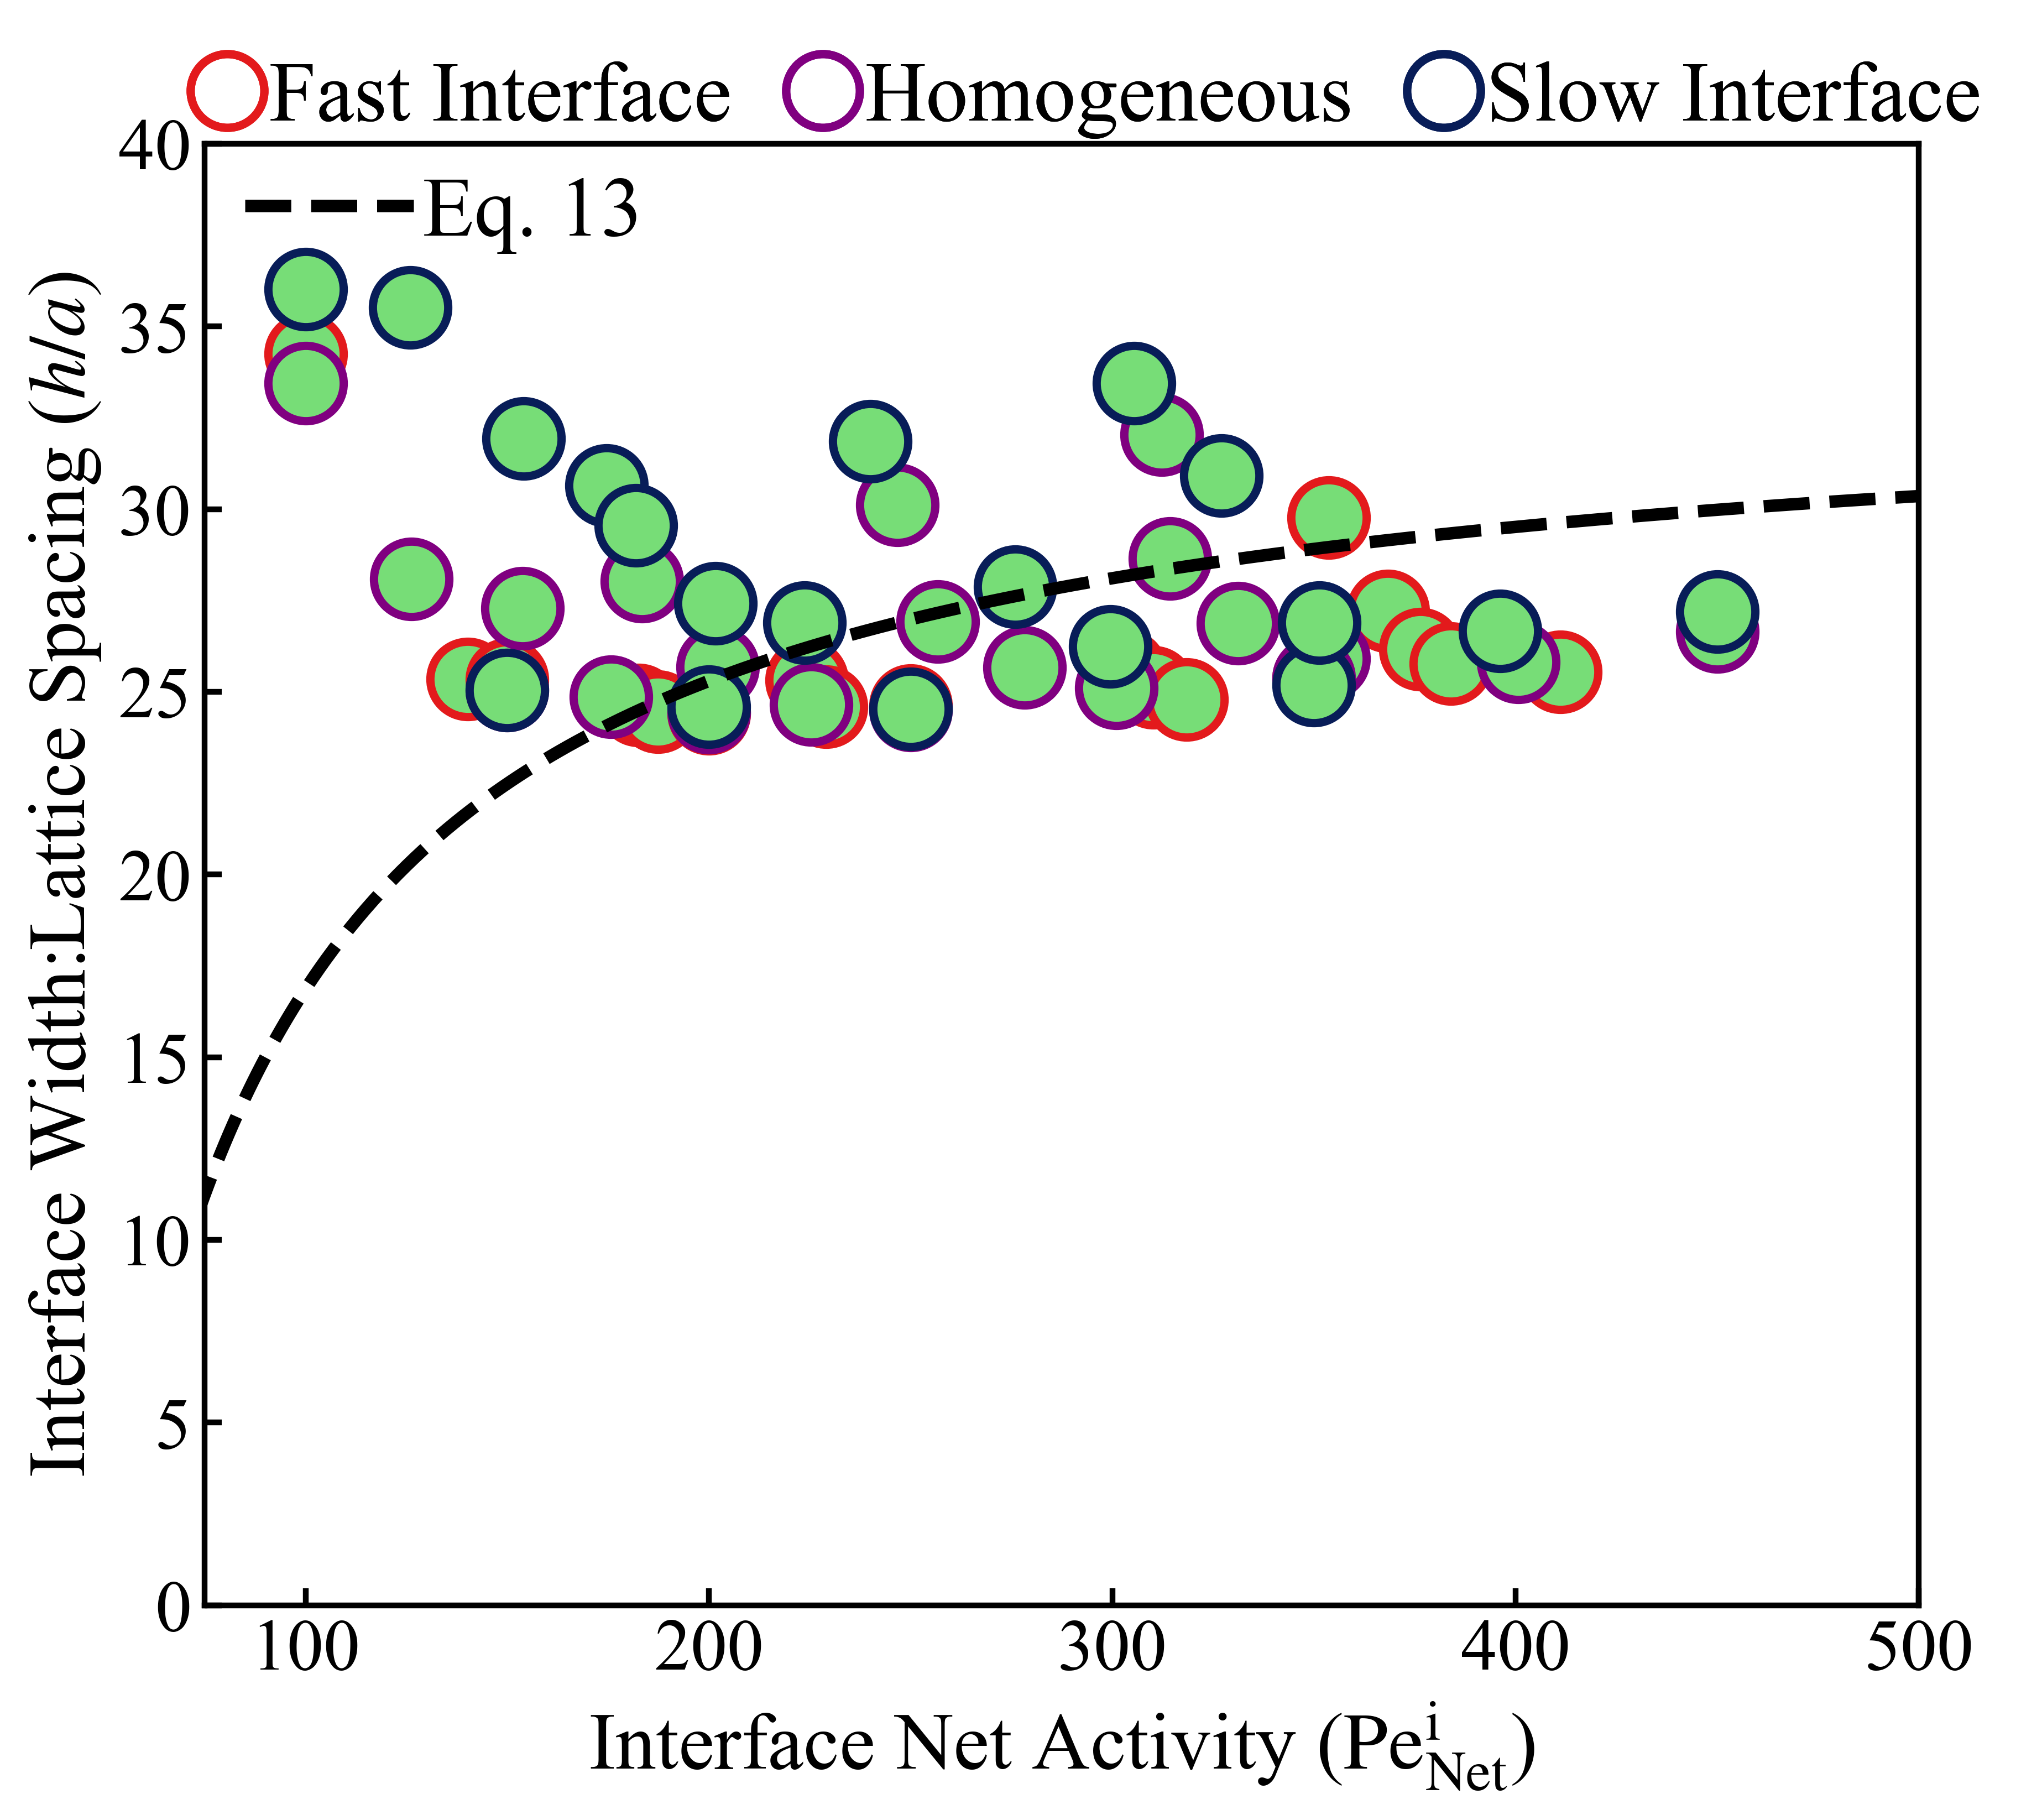

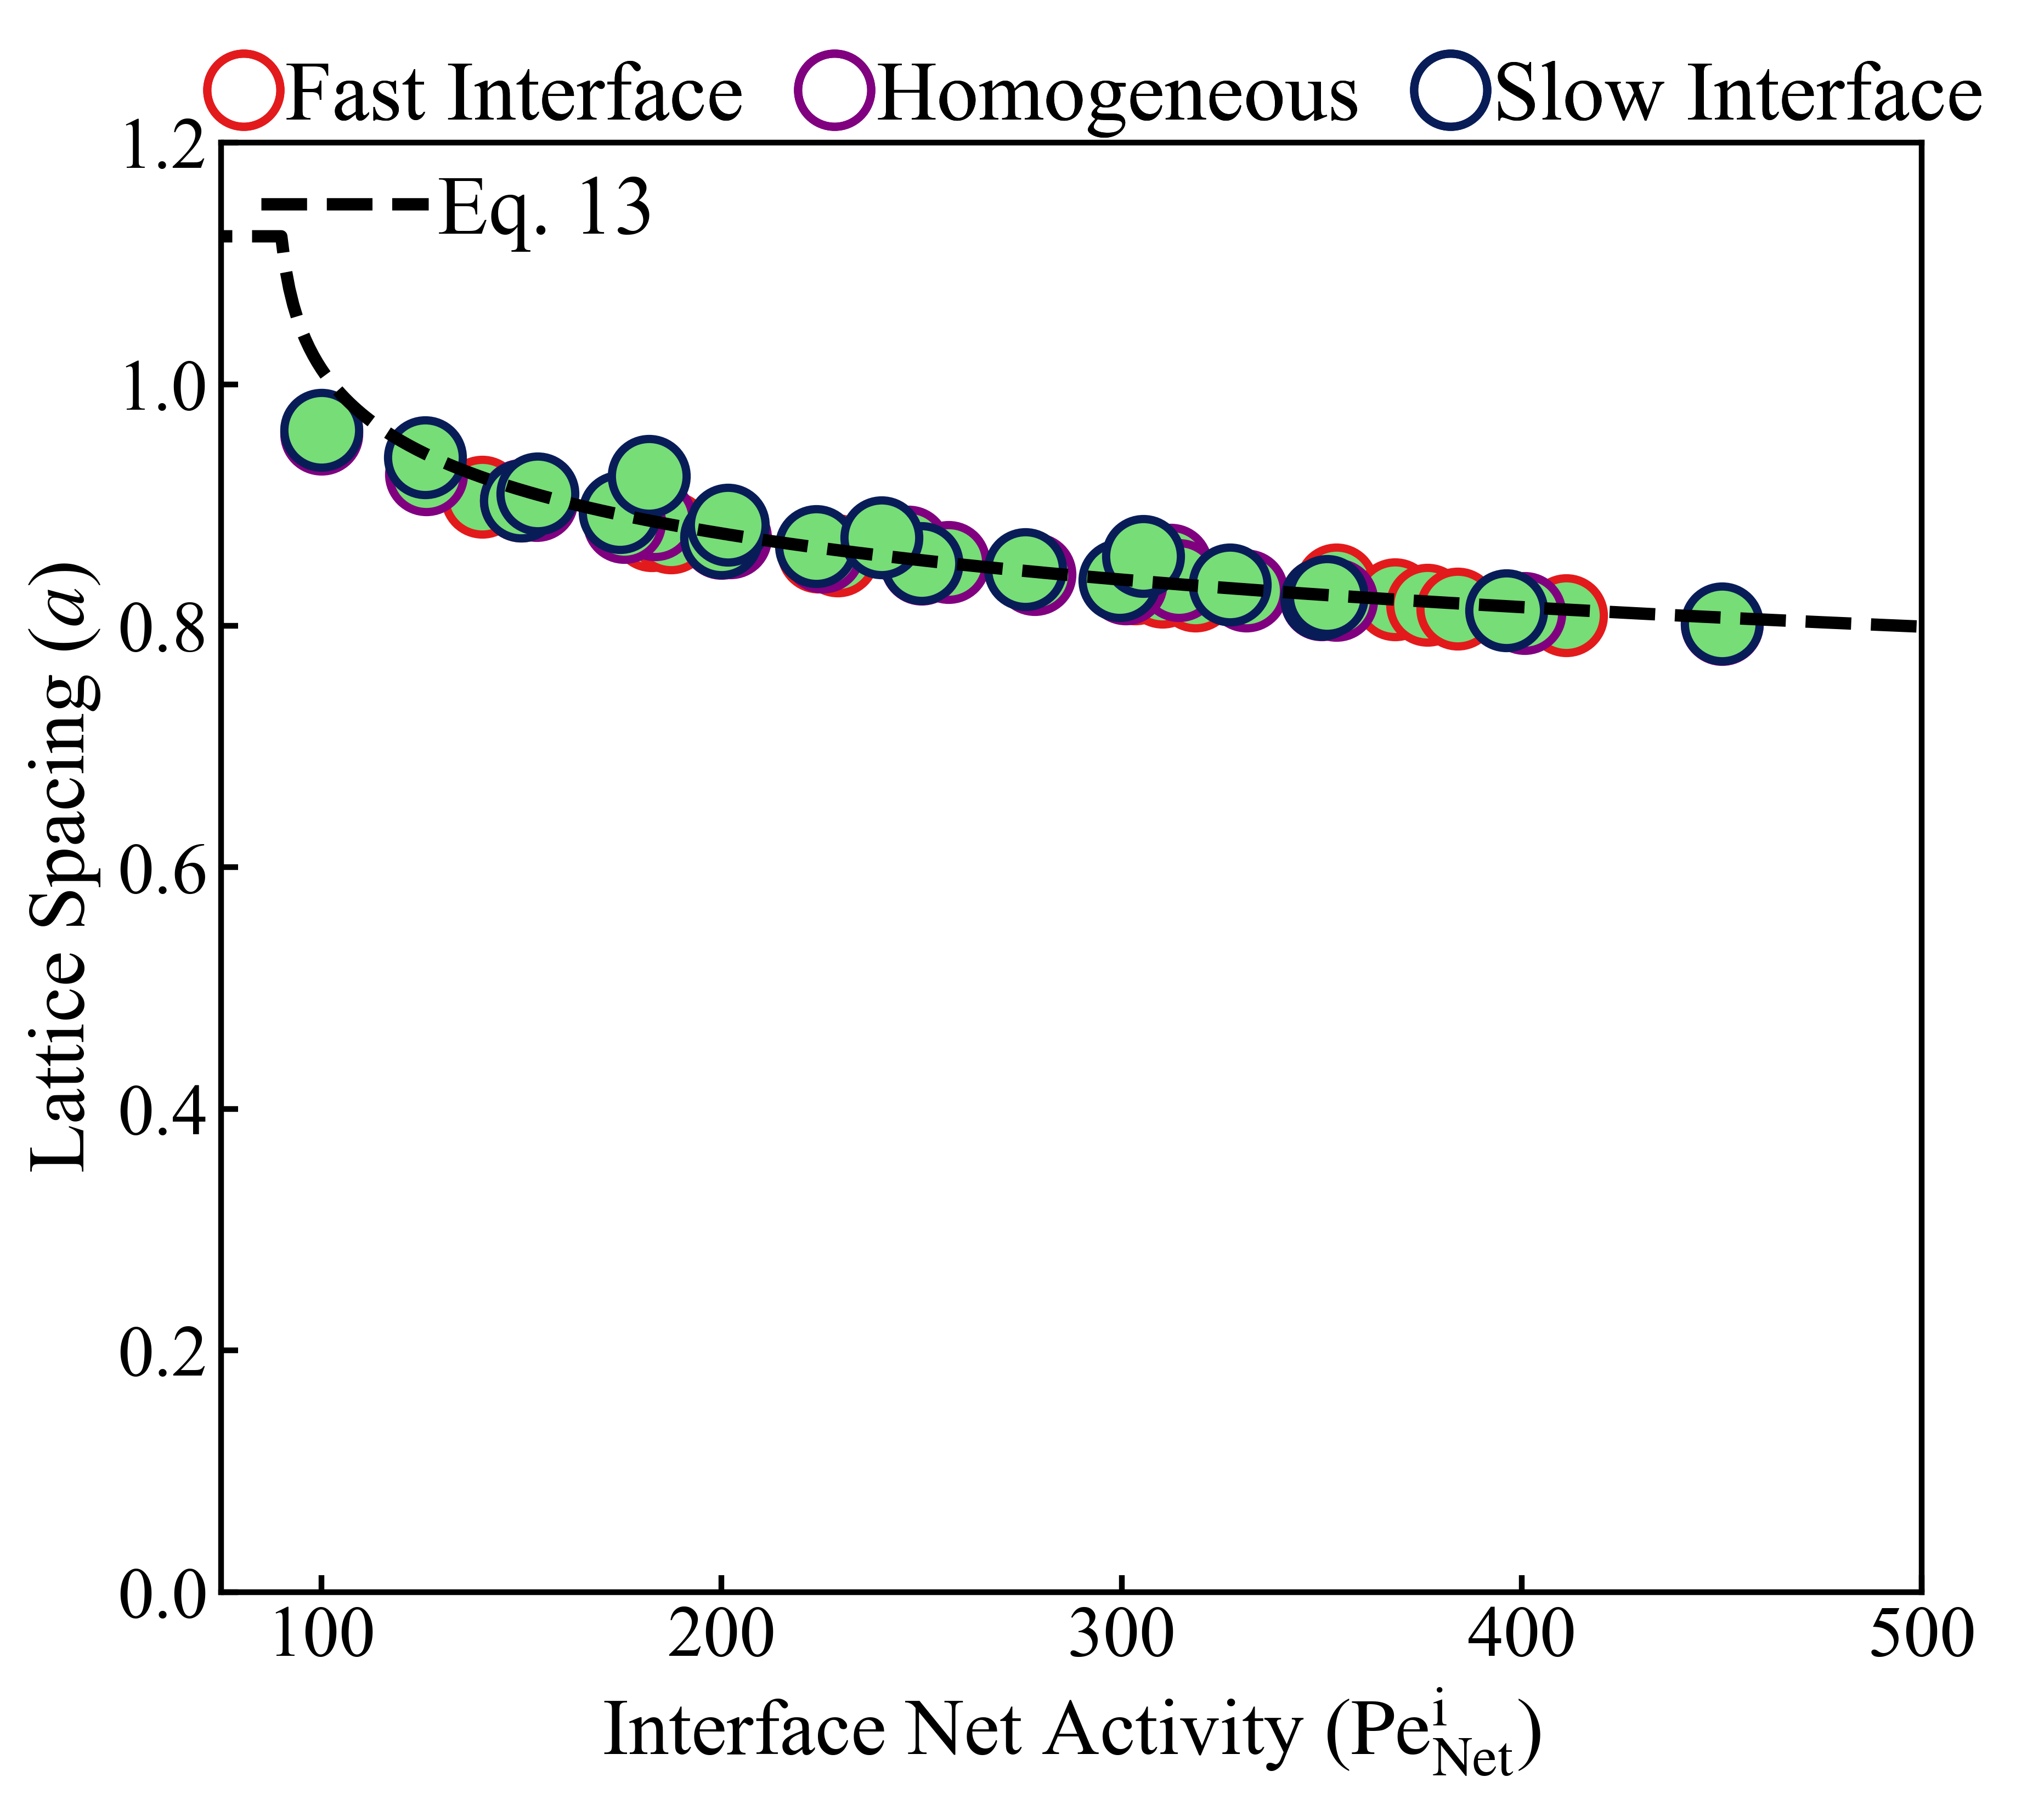

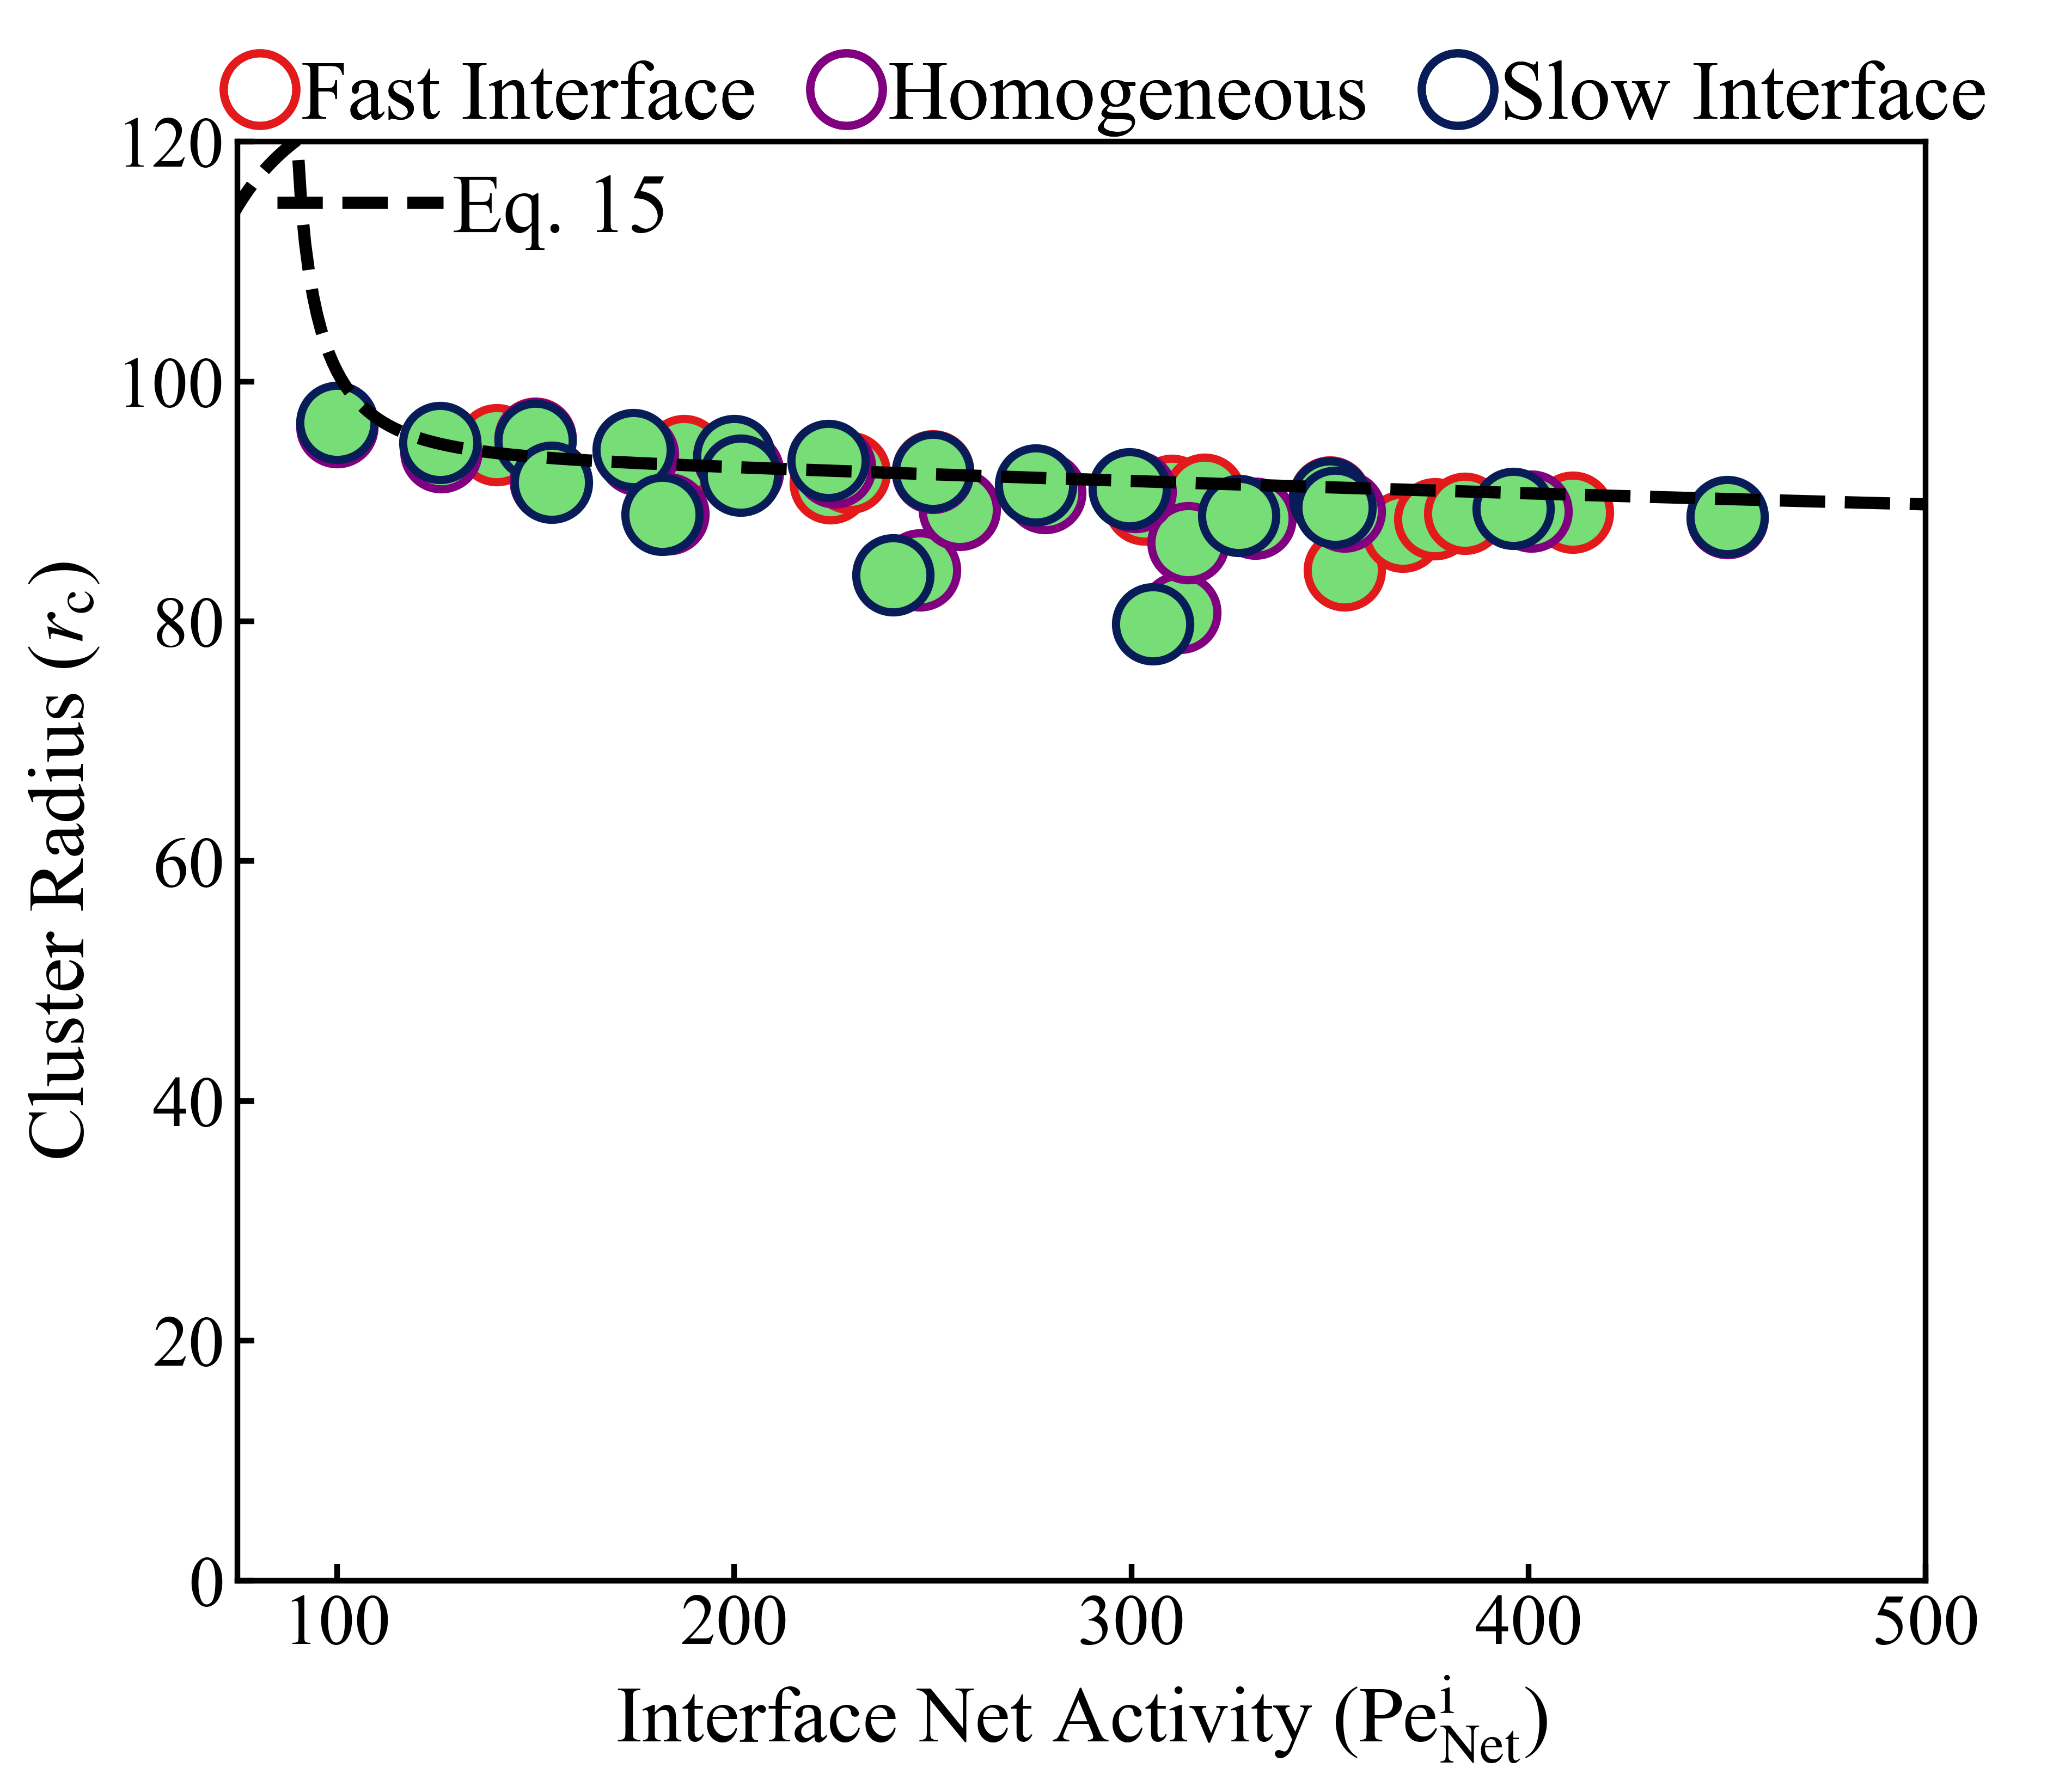

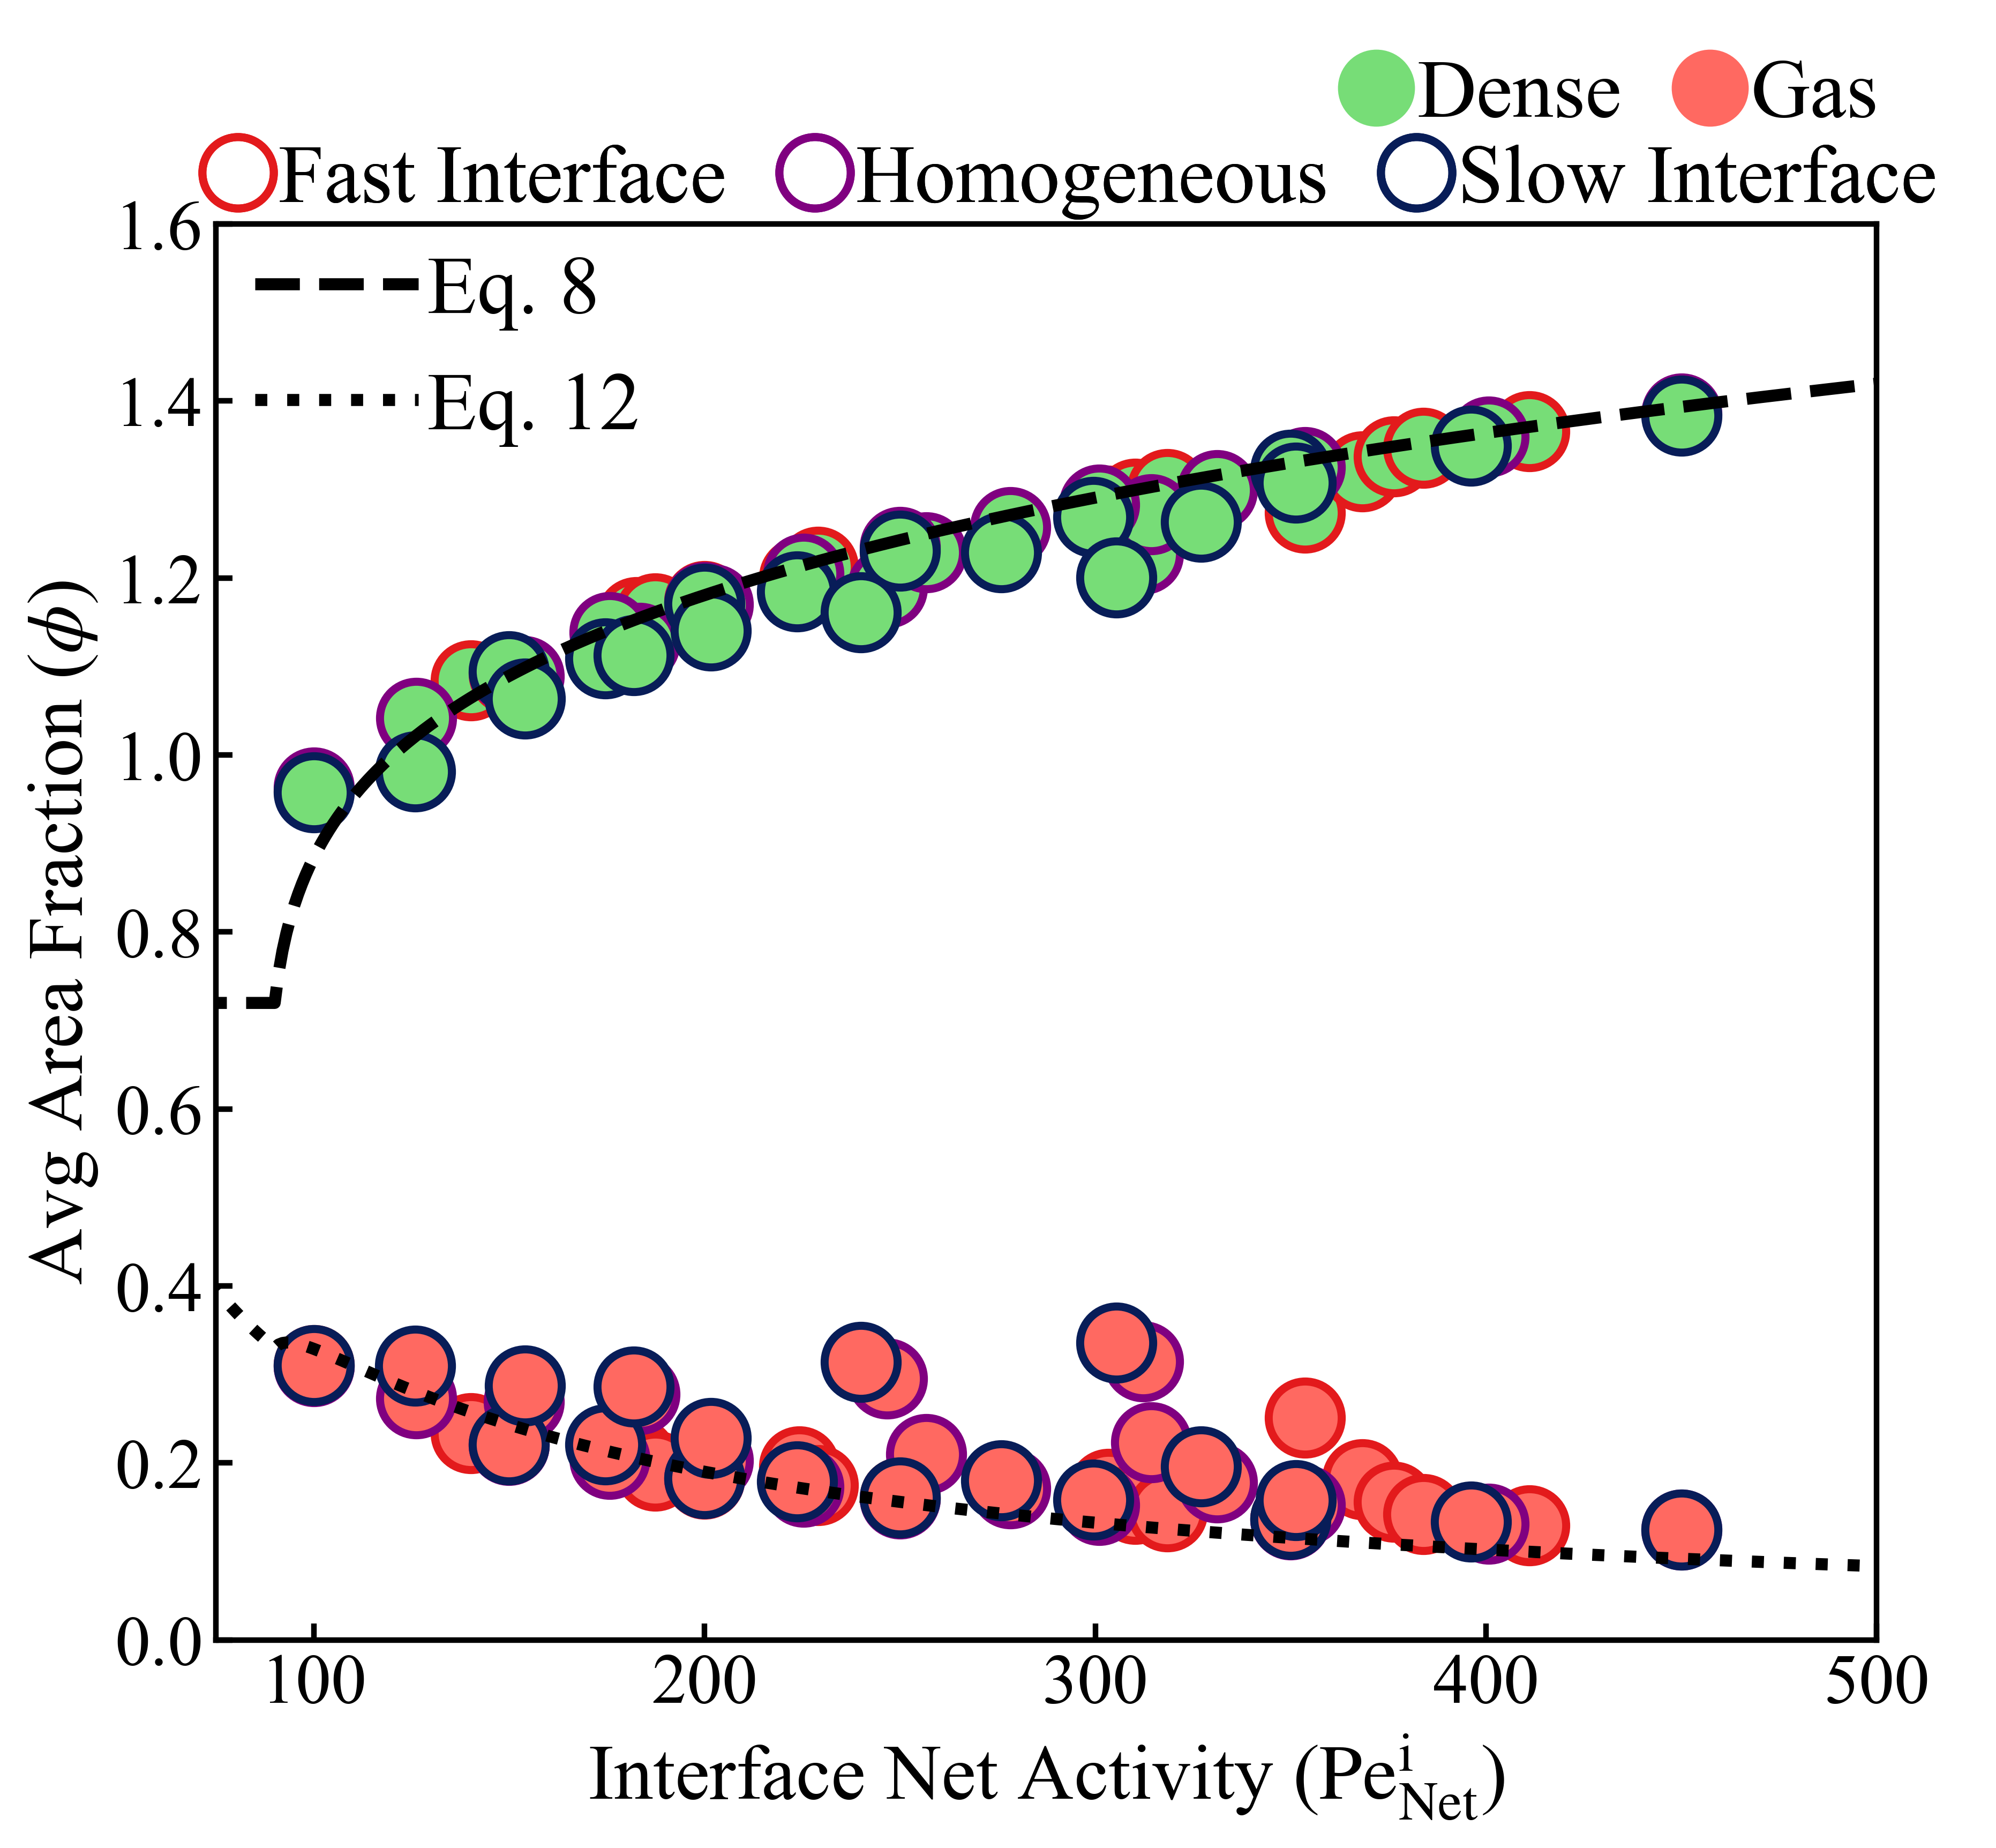

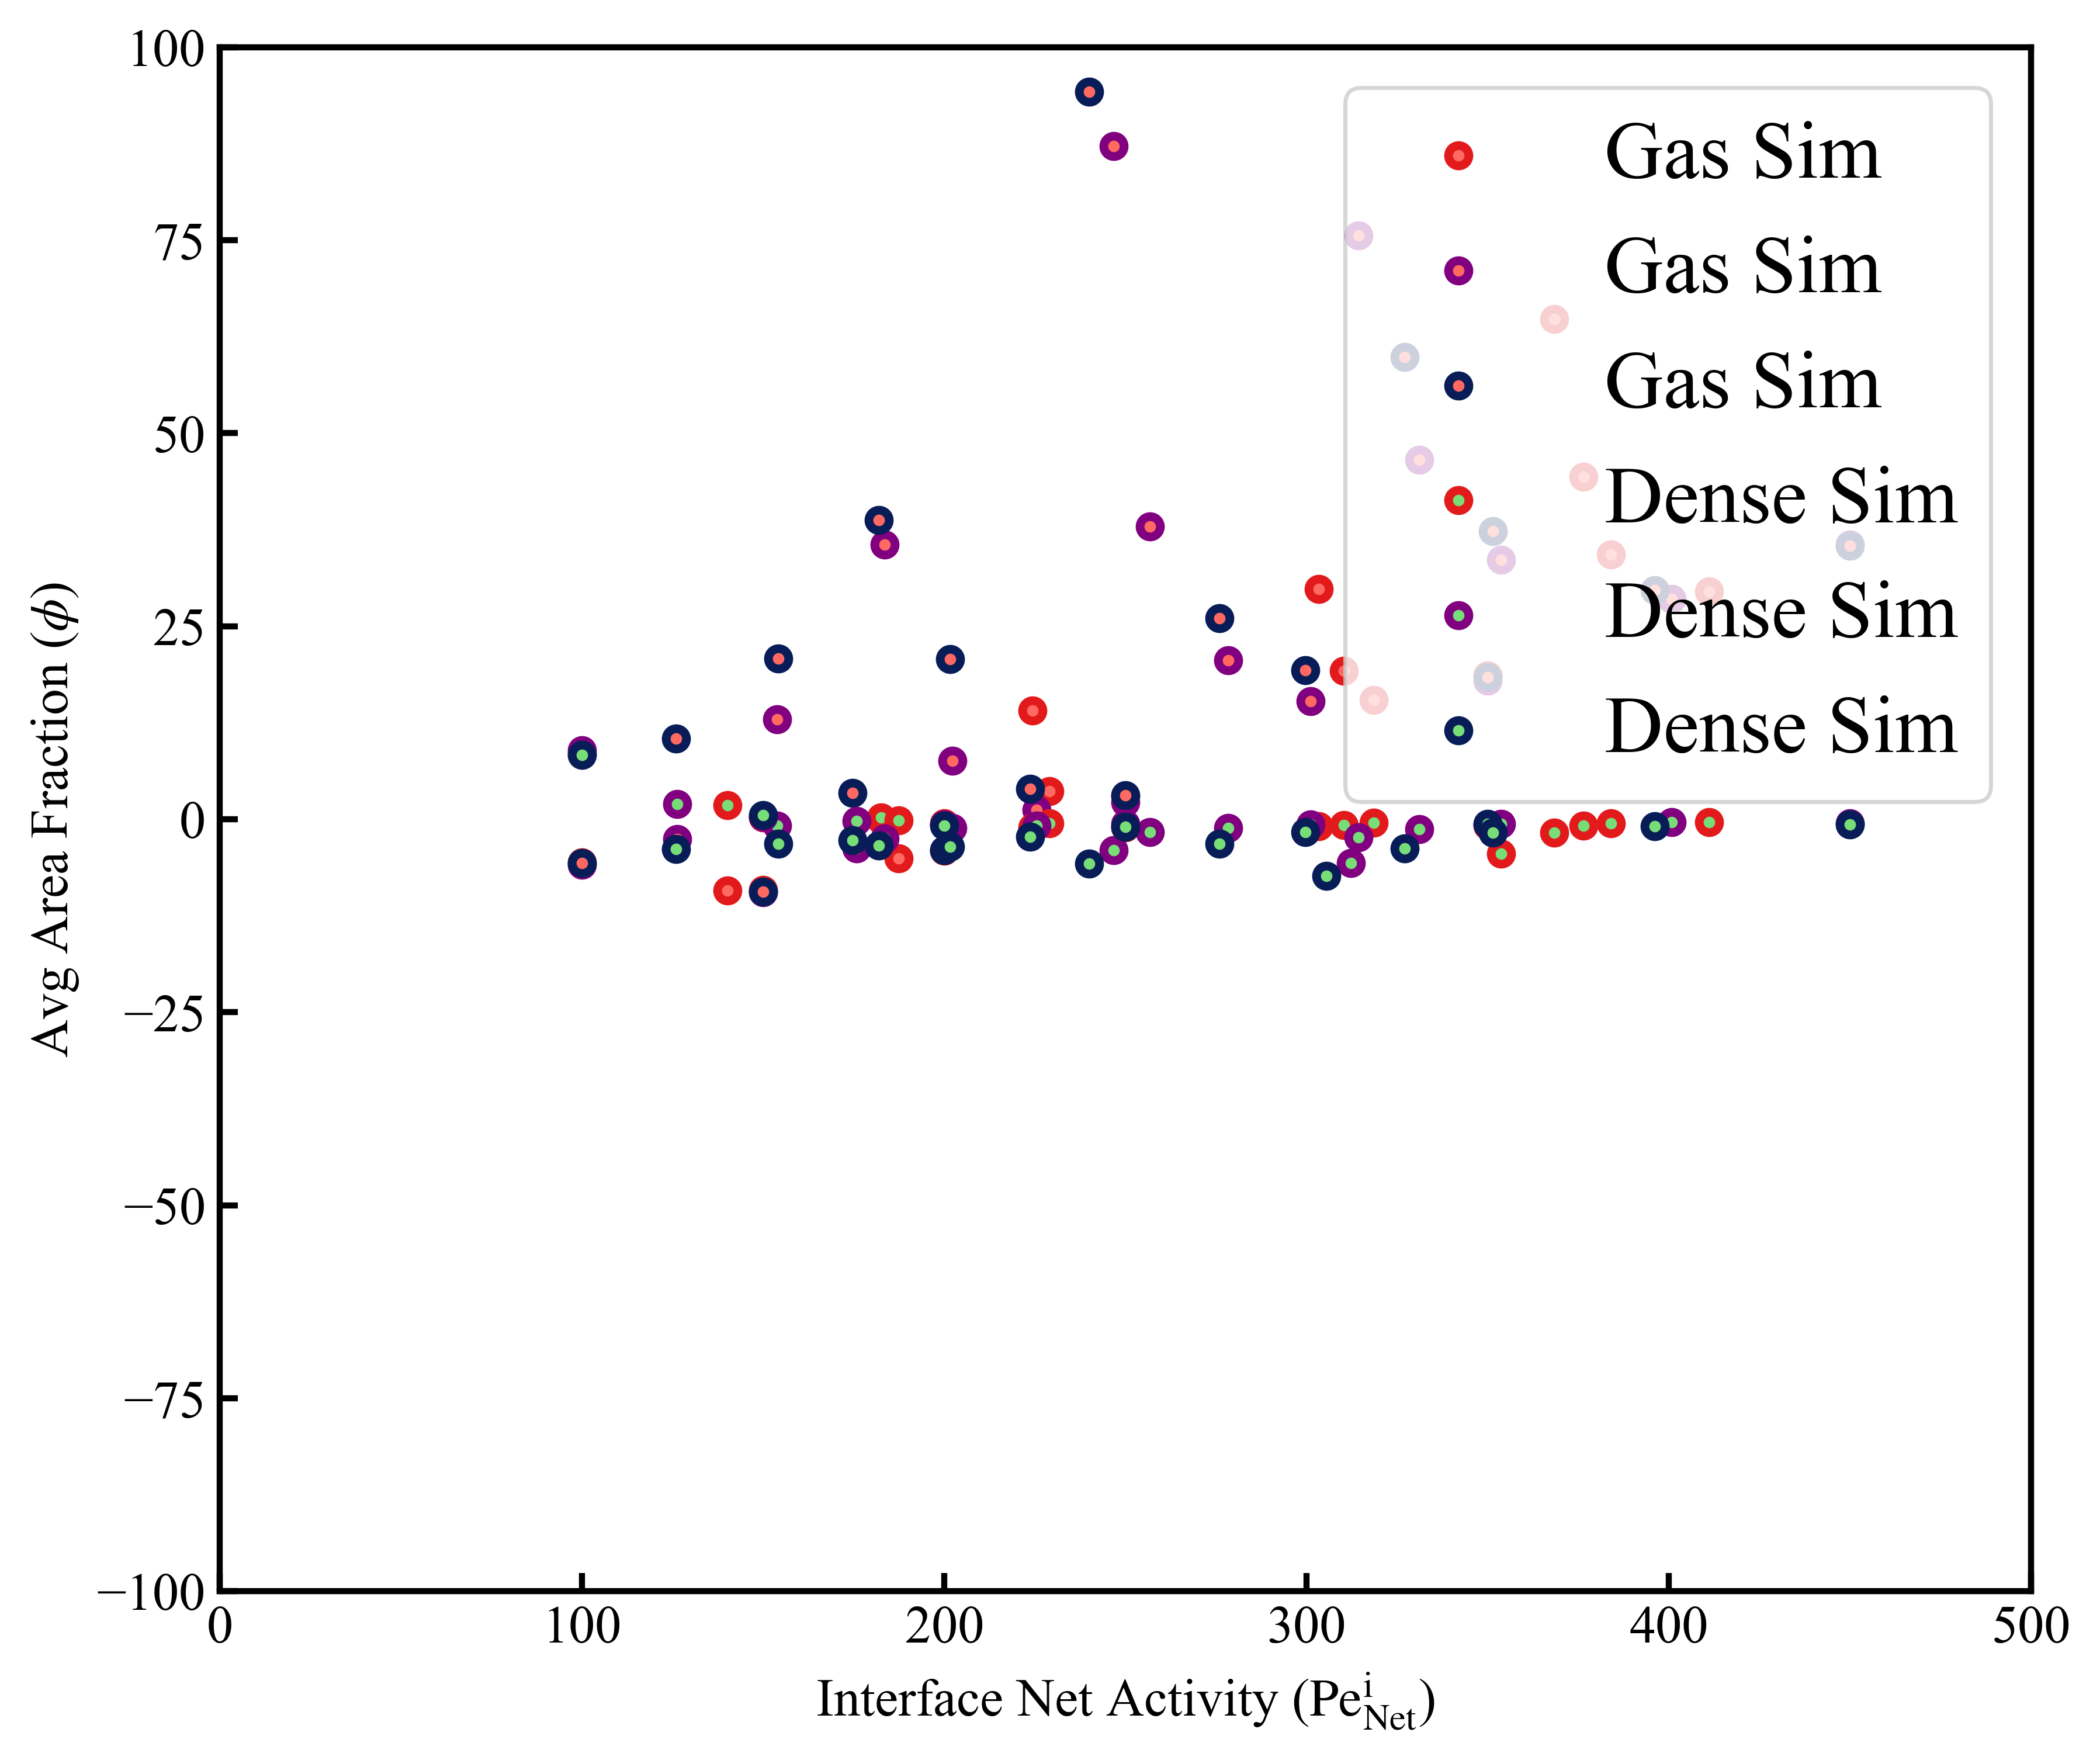

39.21438143586672
51.04156559539912
33.46482170361235
51.85248444726067
16.85710189037003
20.770657531502803
nan
nan


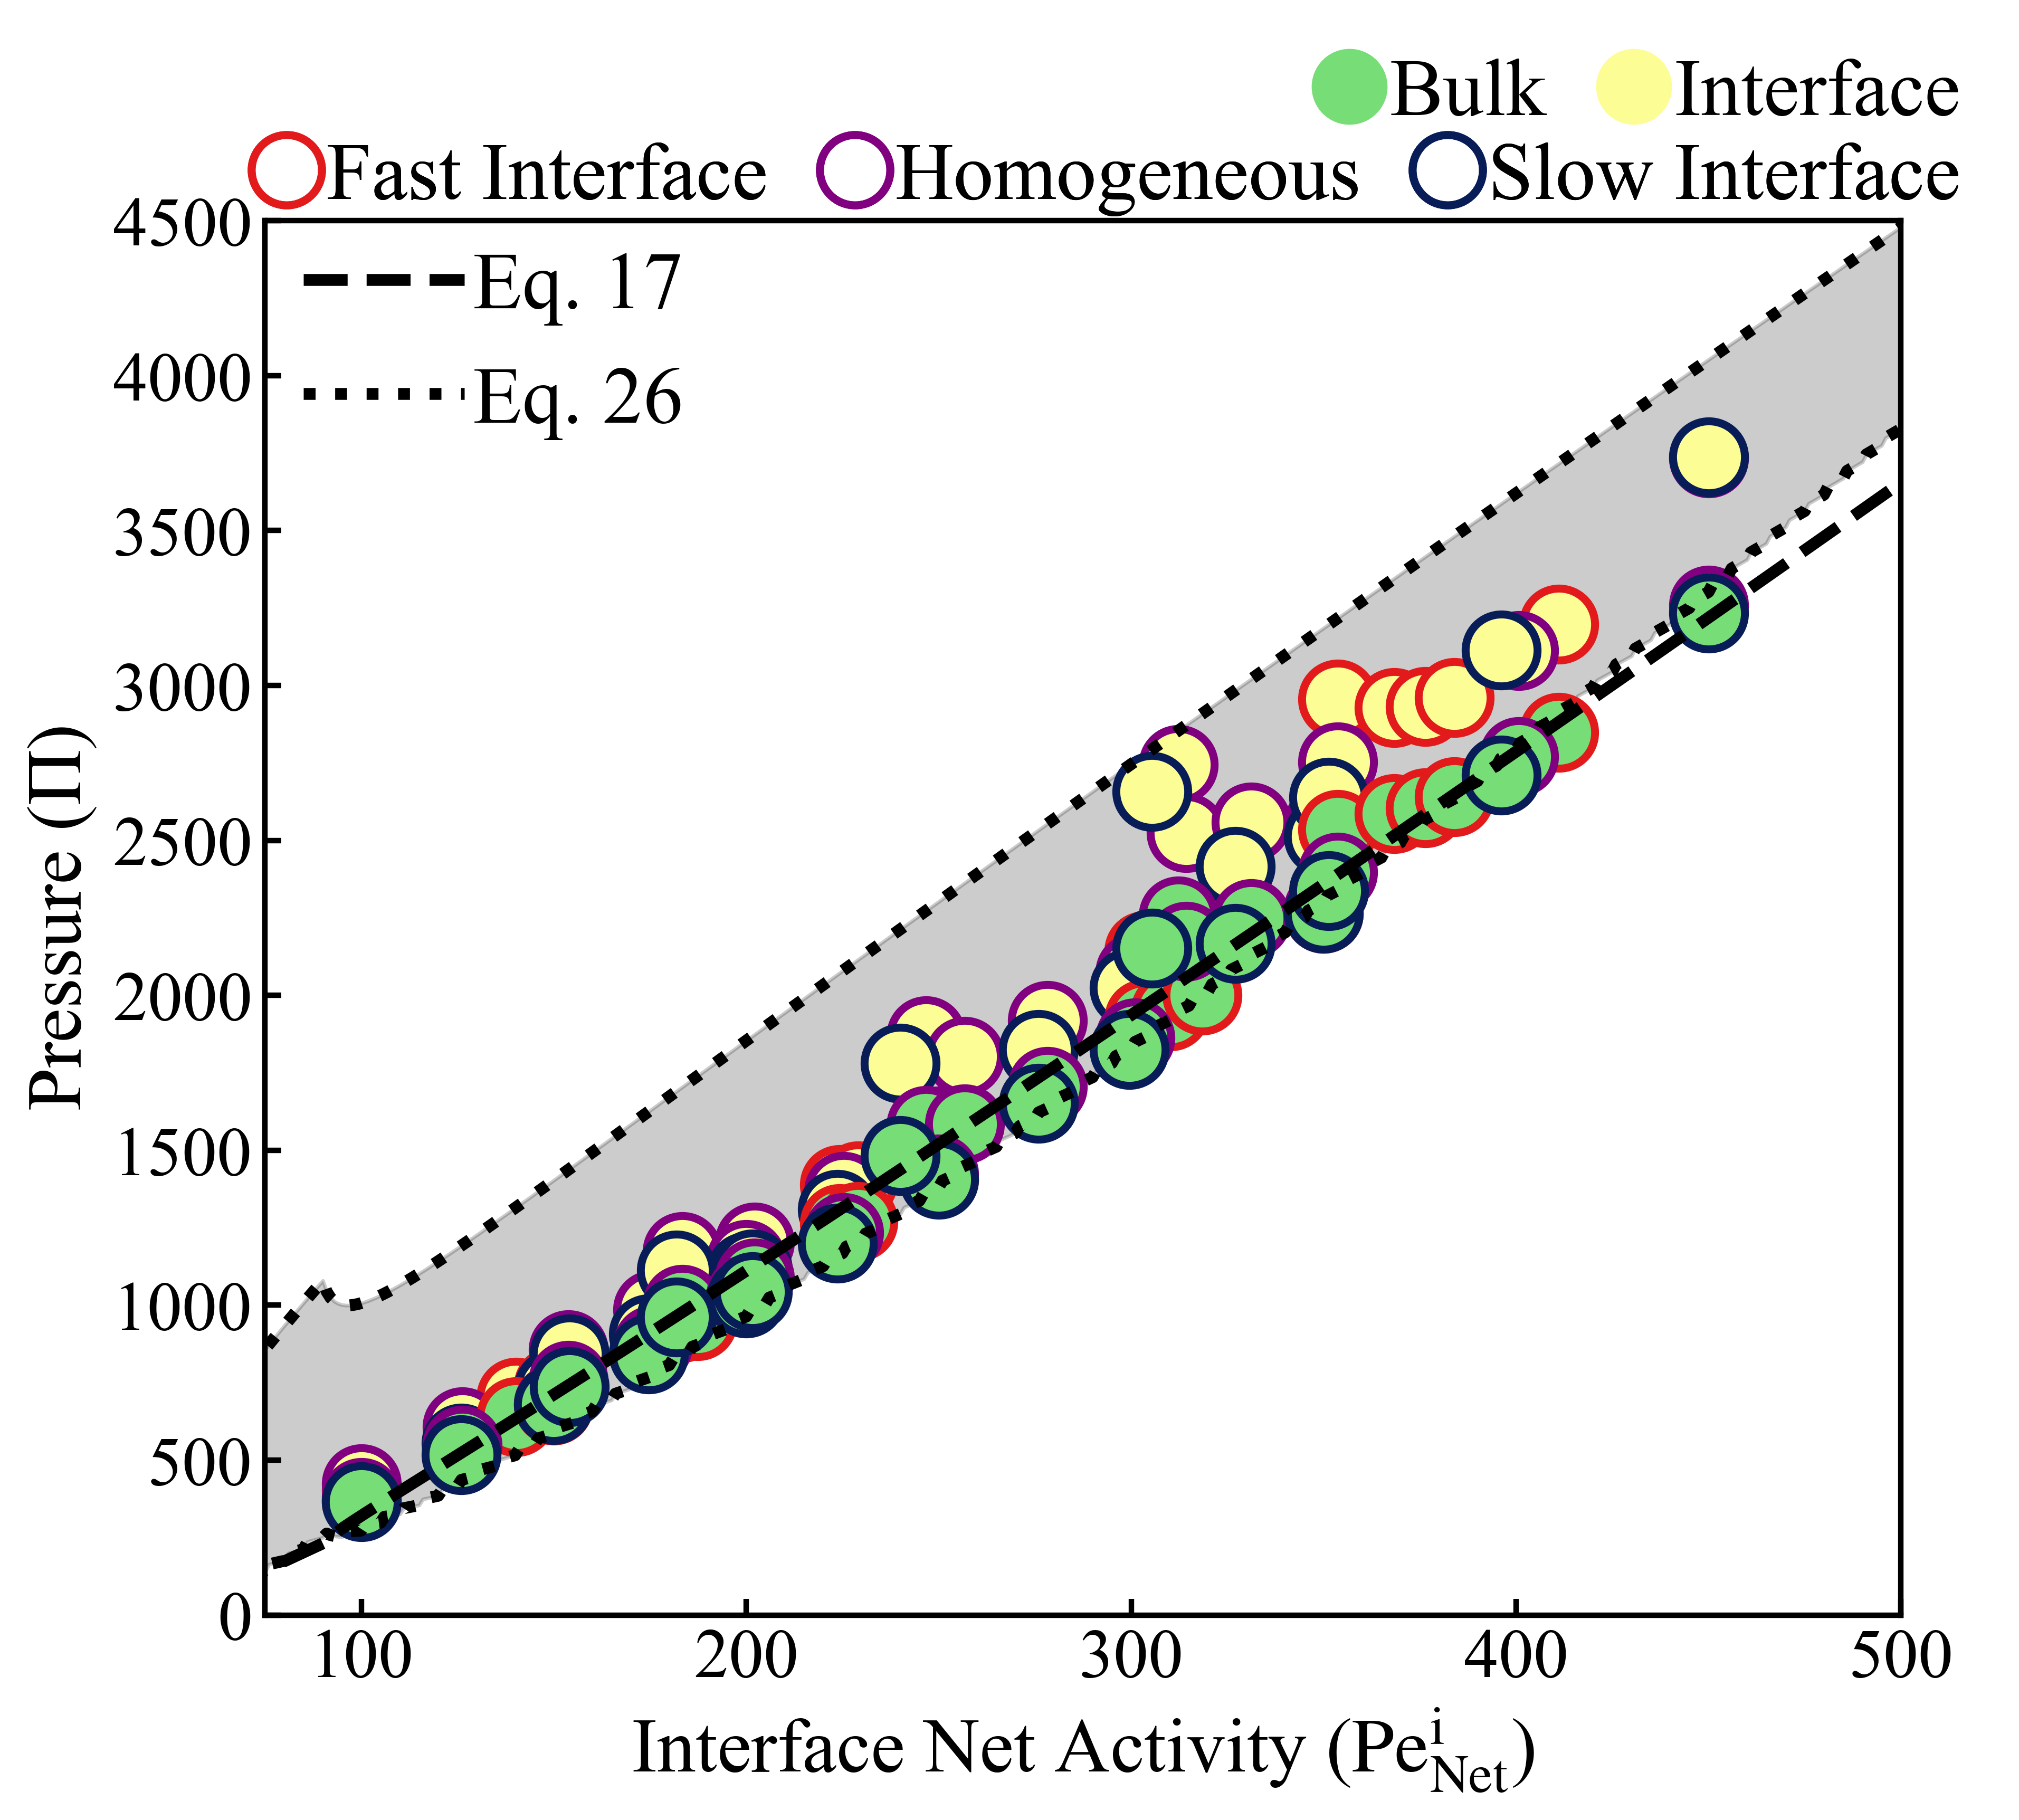

In [34]:
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
print(len(int_pe_net))
print(len(avg_clust))

fast = np.where((interpart_type==0) & (interpart_peA >50))[0]
rand = np.where((interpart_type==1) & (interpart_peA >50))[0]
slow = np.where((interpart_type==2) & (interpart_peB >50))[0]
fig, ax1 = plt.subplots(figsize=(8,7))
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Interface', markersize=(2.4*msz * mkSz[0])))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, clust_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_clust[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_clust[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_clust[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 50000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Size ($N_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()




fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_width[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_width[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 35])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2/lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_width[fast]/all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_width[rand]/all_lat_time_mean[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_width[slow]/all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 40])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width:Lattice Spacing ($h/a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], all_lat_time_mean[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.2])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, rad_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_rad[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], avg_rad[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], avg_rad[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 120])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 15', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)

plt.show()
    
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(int_pe_net[rand], phi_gas_sim[rand], edgecolor='purple',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], avg_area2[rand] * (np.pi/4), edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')

plt.scatter(int_pe_net[fast], 100*(phi_gas_sim[fast]-phi_gas_theory[fast])/phi_gas_theory[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net[rand], 100*(phi_gas_sim[rand]-phi_gas_theory[rand])/phi_gas_theory[rand],edgecolor='purple',facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net[slow], 100*(phi_gas_sim[slow]-phi_gas_theory[slow])/phi_gas_theory[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')

plt.scatter(int_pe_net[fast], 100*(avg_area2[fast] * (np.pi/4) - phi_dense_theory[fast])/phi_dense_theory[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net[rand], 100*(avg_area2[rand] * (np.pi/4) - phi_dense_theory[rand])/phi_dense_theory[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net[slow], 100*(avg_area2[slow] * (np.pi/4) - phi_dense_theory[slow])/phi_dense_theory[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')

ax1.set_xlim([0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Avg Area Fraction ($\phi$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

error = 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory3)/phi_gas_theory3
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory4)/phi_gas_theory4
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory5)/phi_gas_theory5
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)


fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
ax1.fill_between(int_pe_net_final_arr, press_theory_min_arr, press_theory_max_arr, color='black', alpha=0.2)

plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[rand], align_press_arr[rand], edgecolor='purple',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[rand], interpart_press[rand], edgecolor='purple',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 26', markerfacecolor='dotted', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

two_leg = ax1.legend(handles=fast_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.5, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(two_leg)


plt.show()




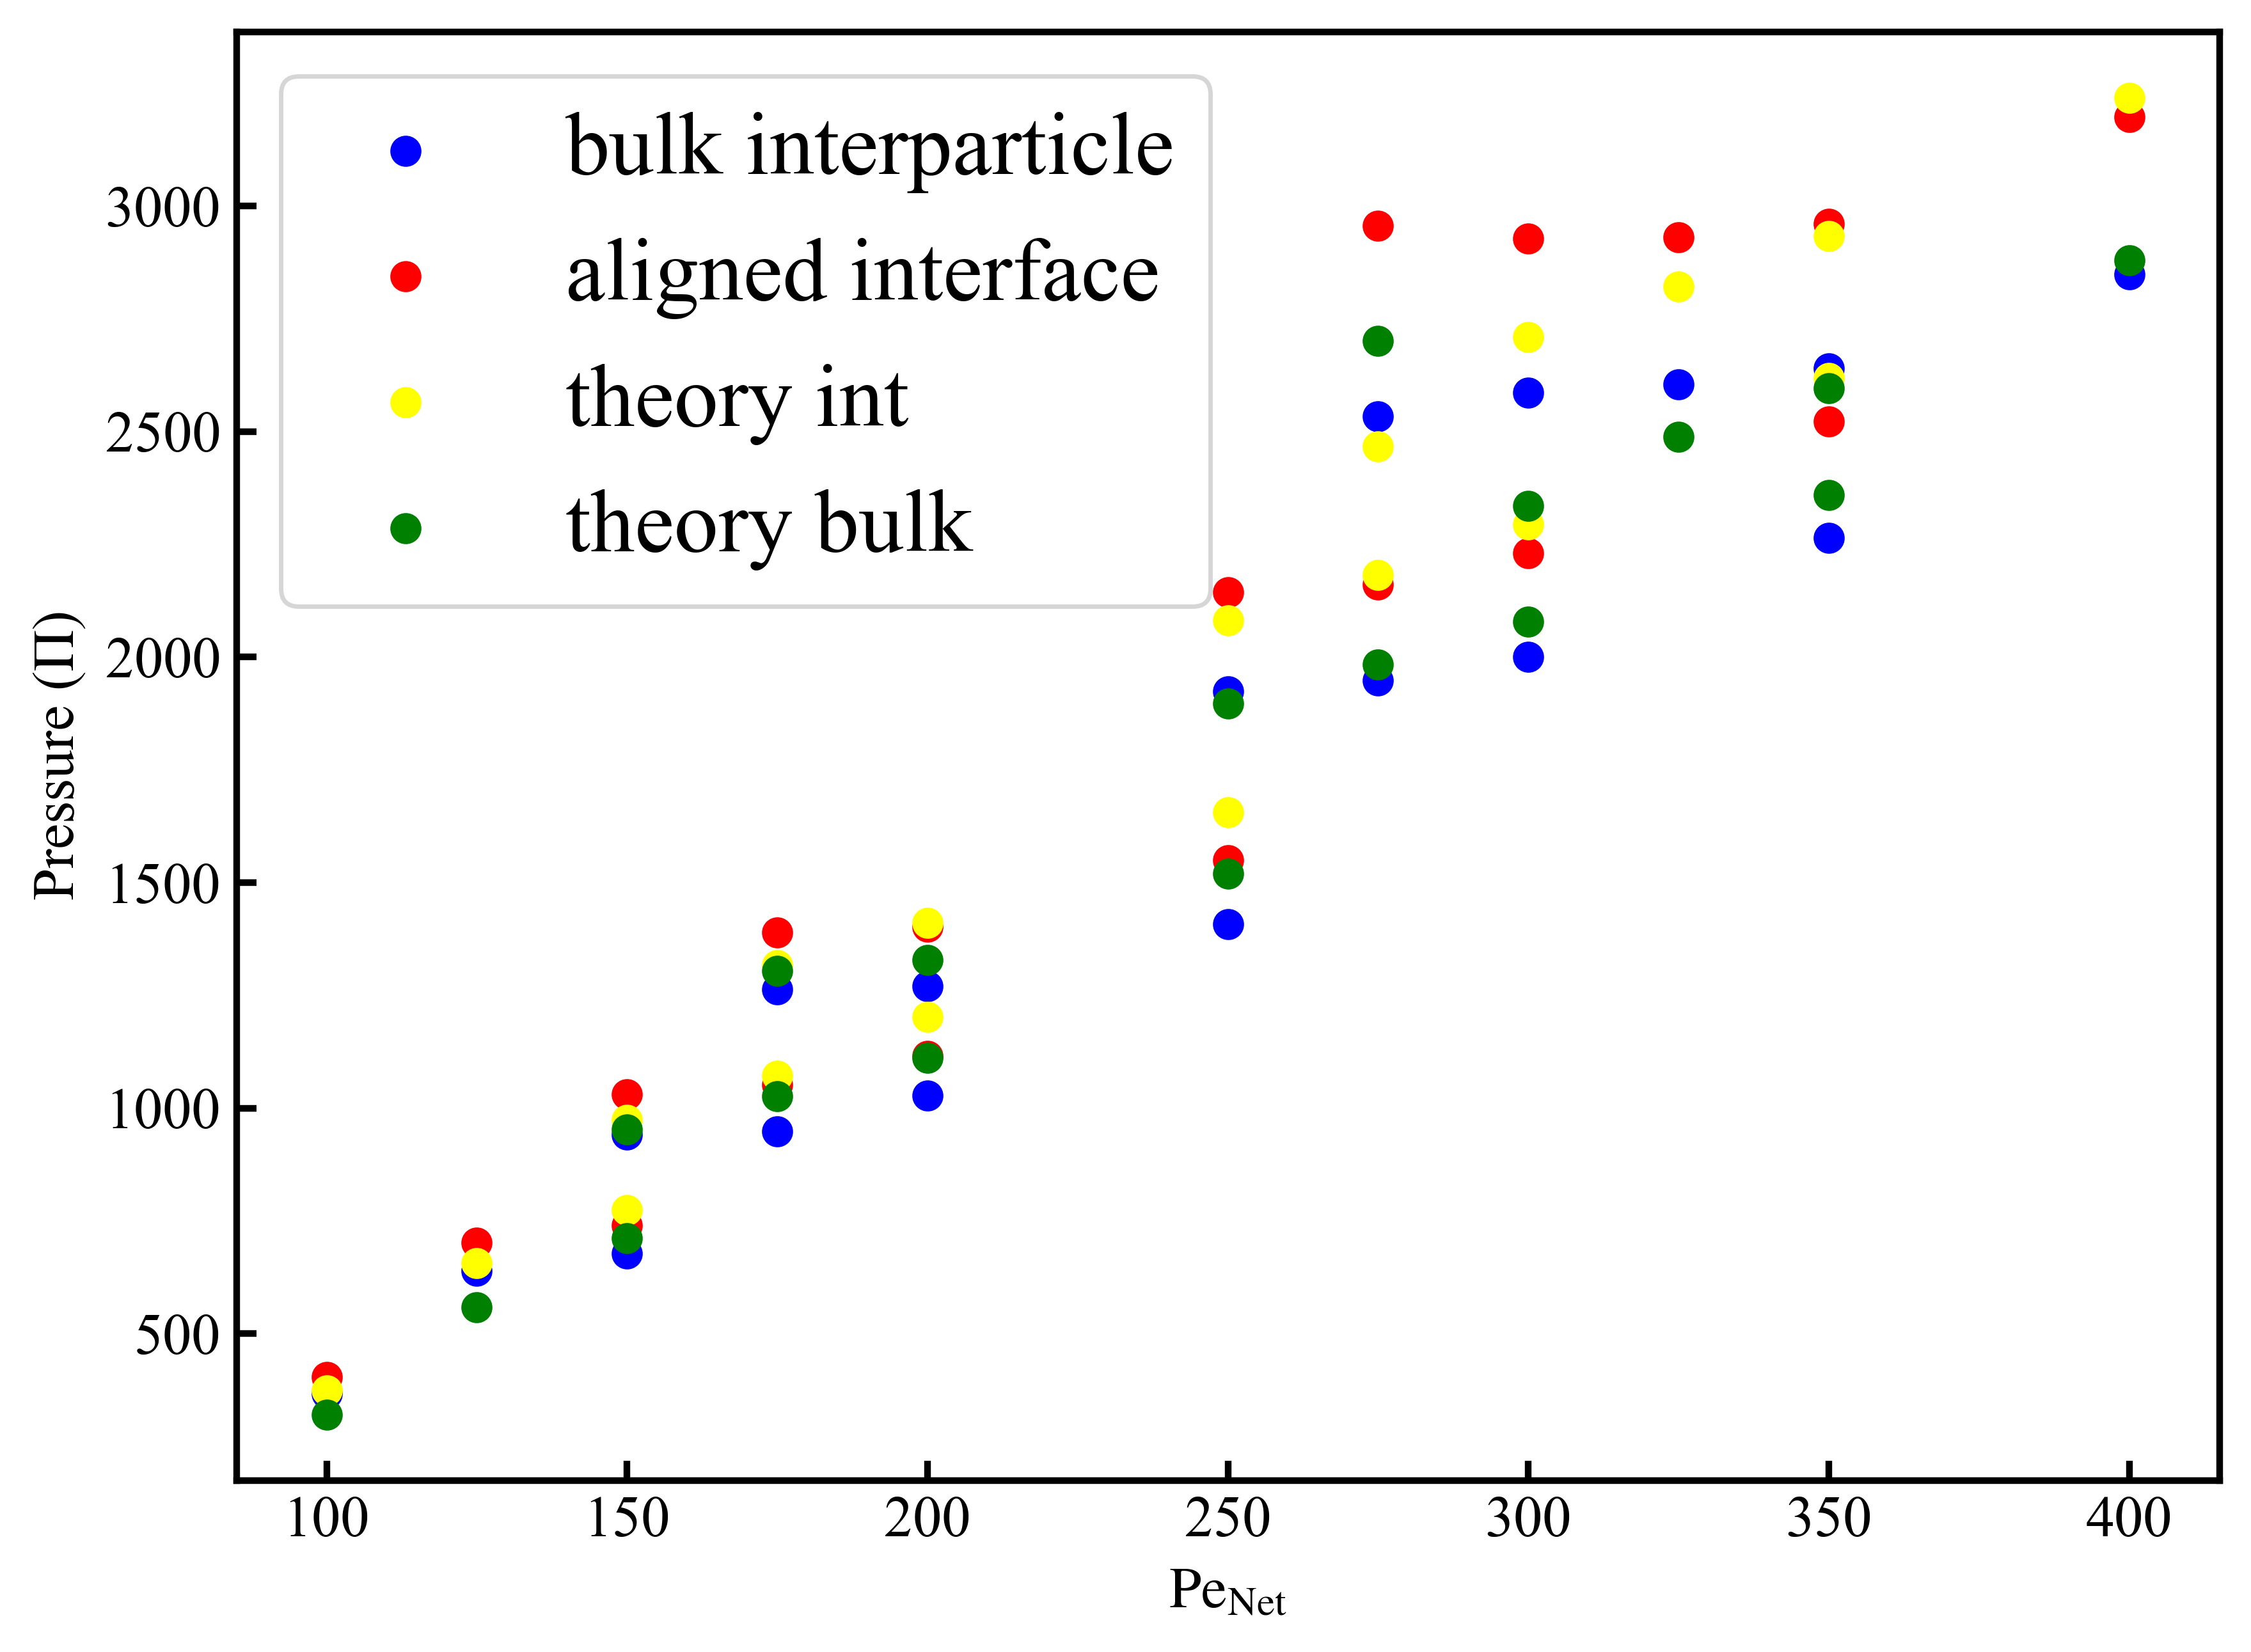

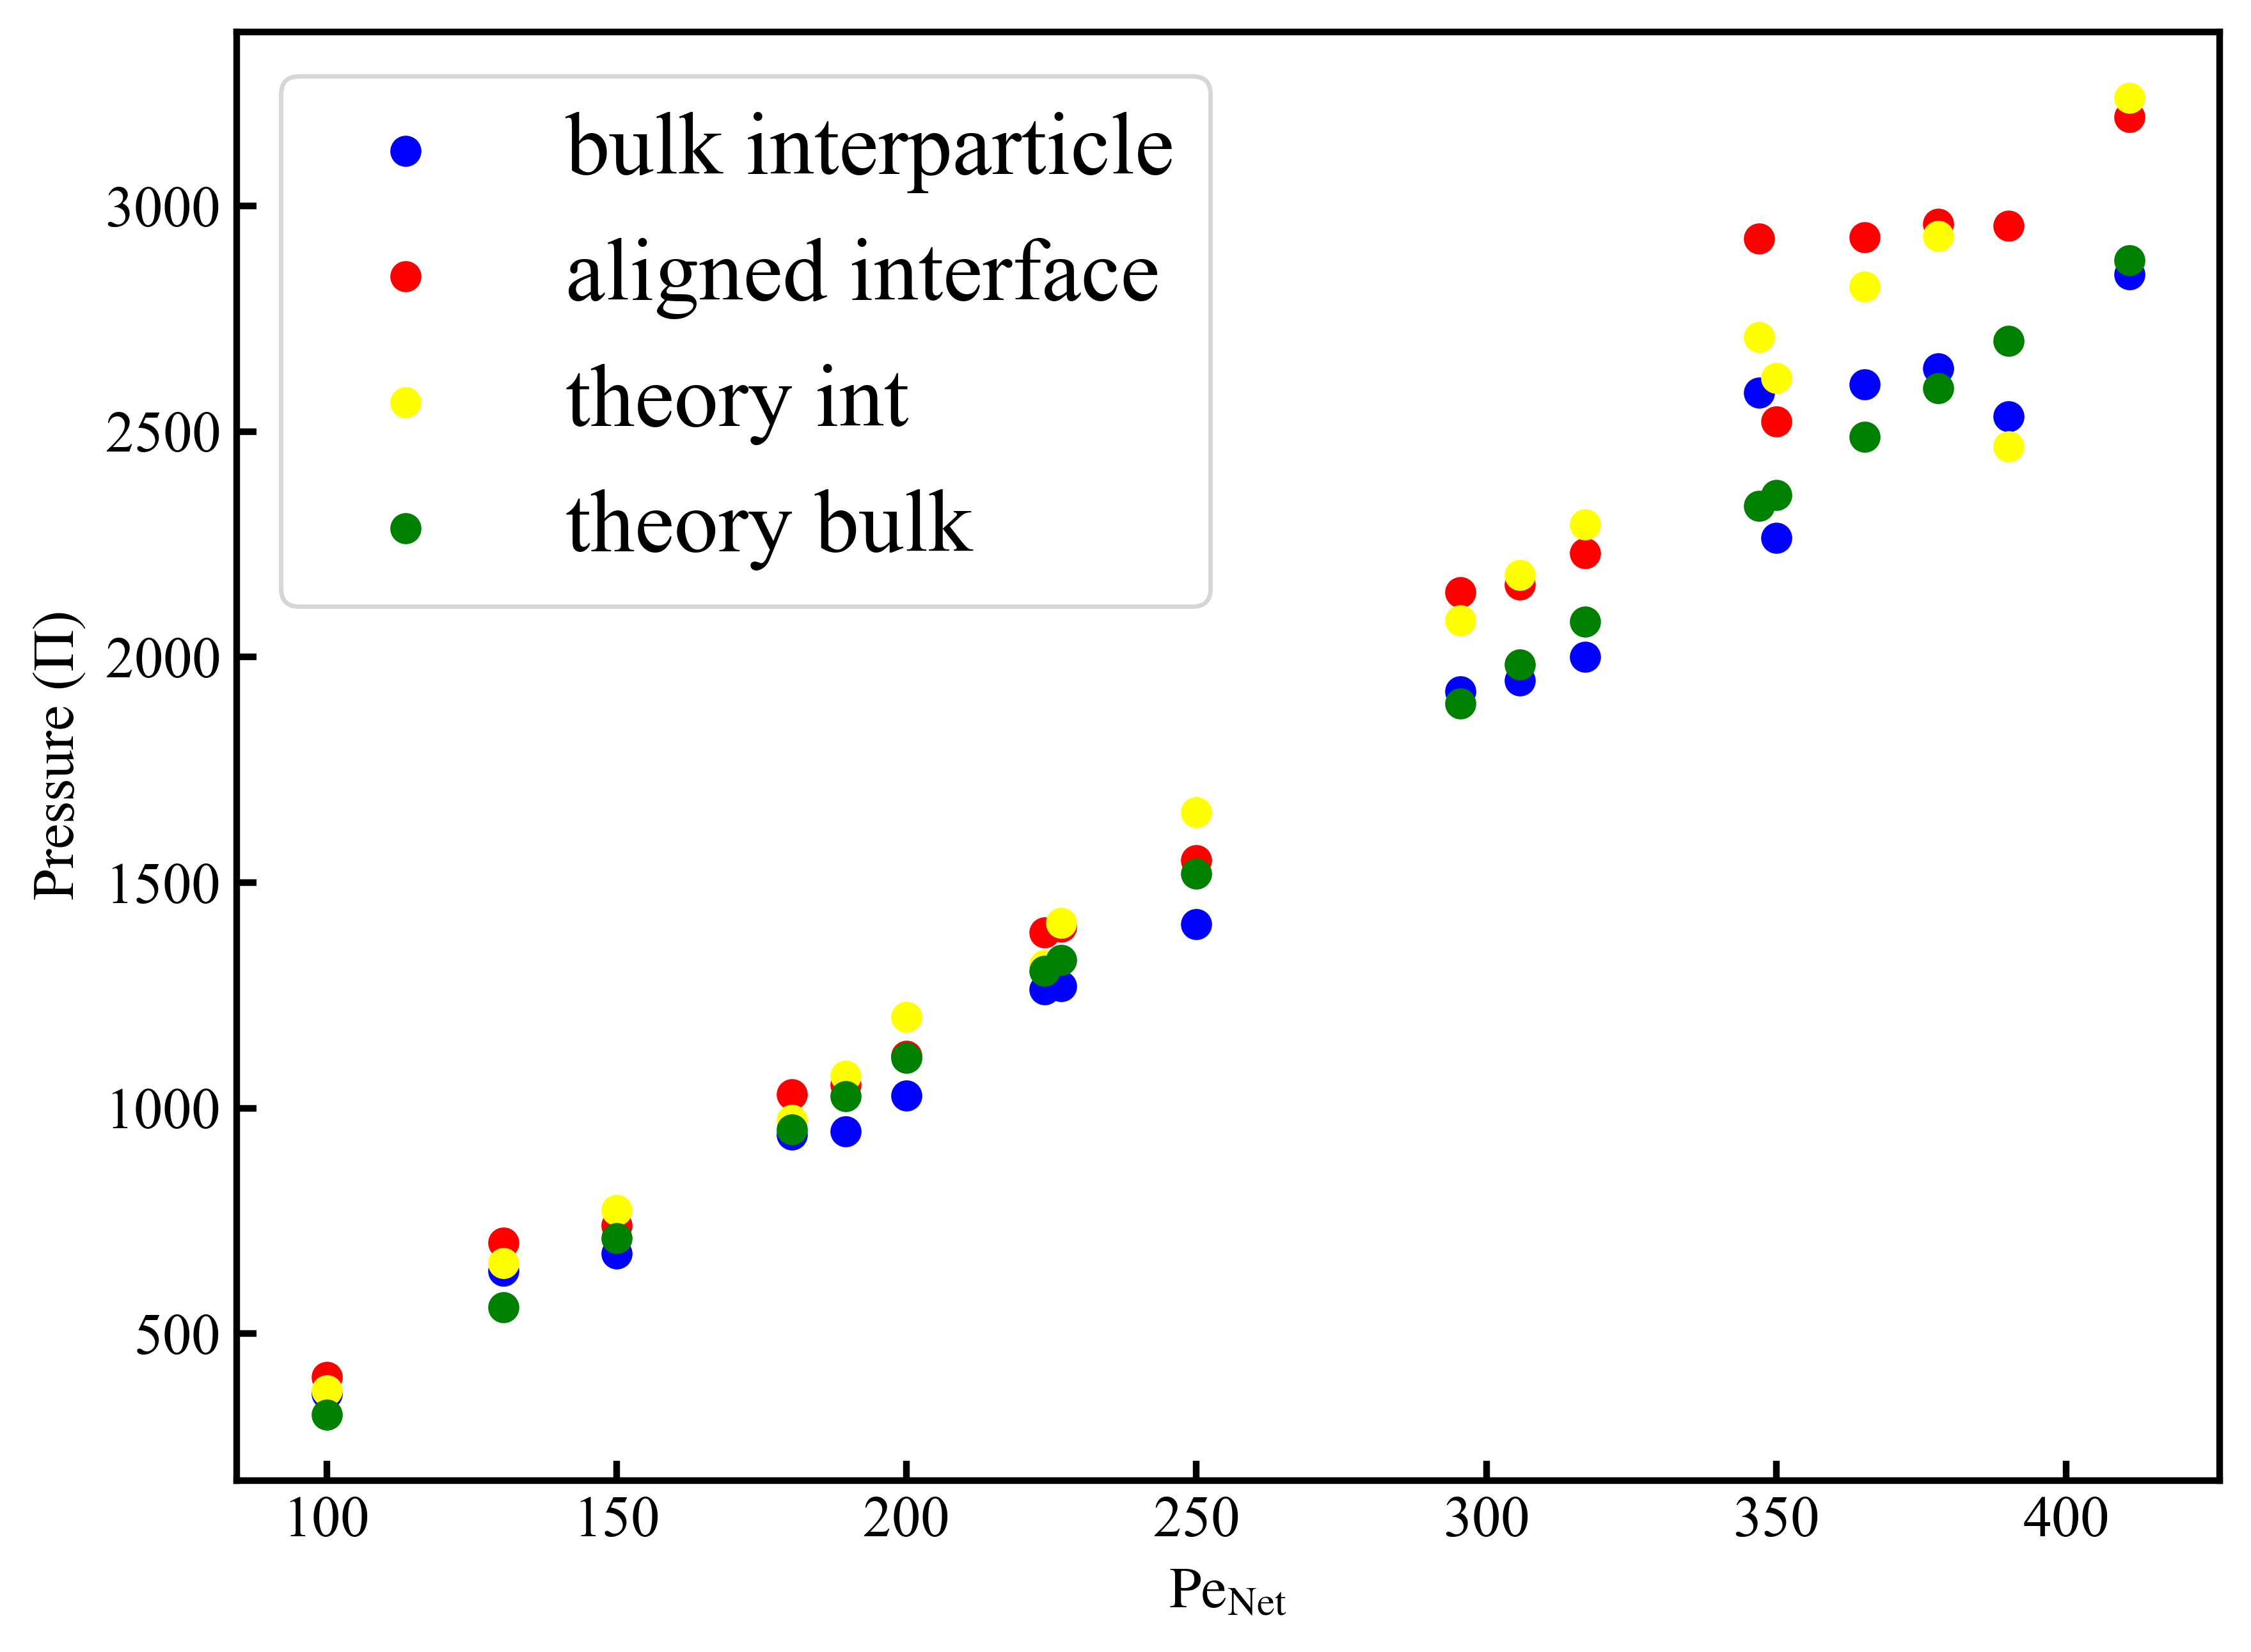

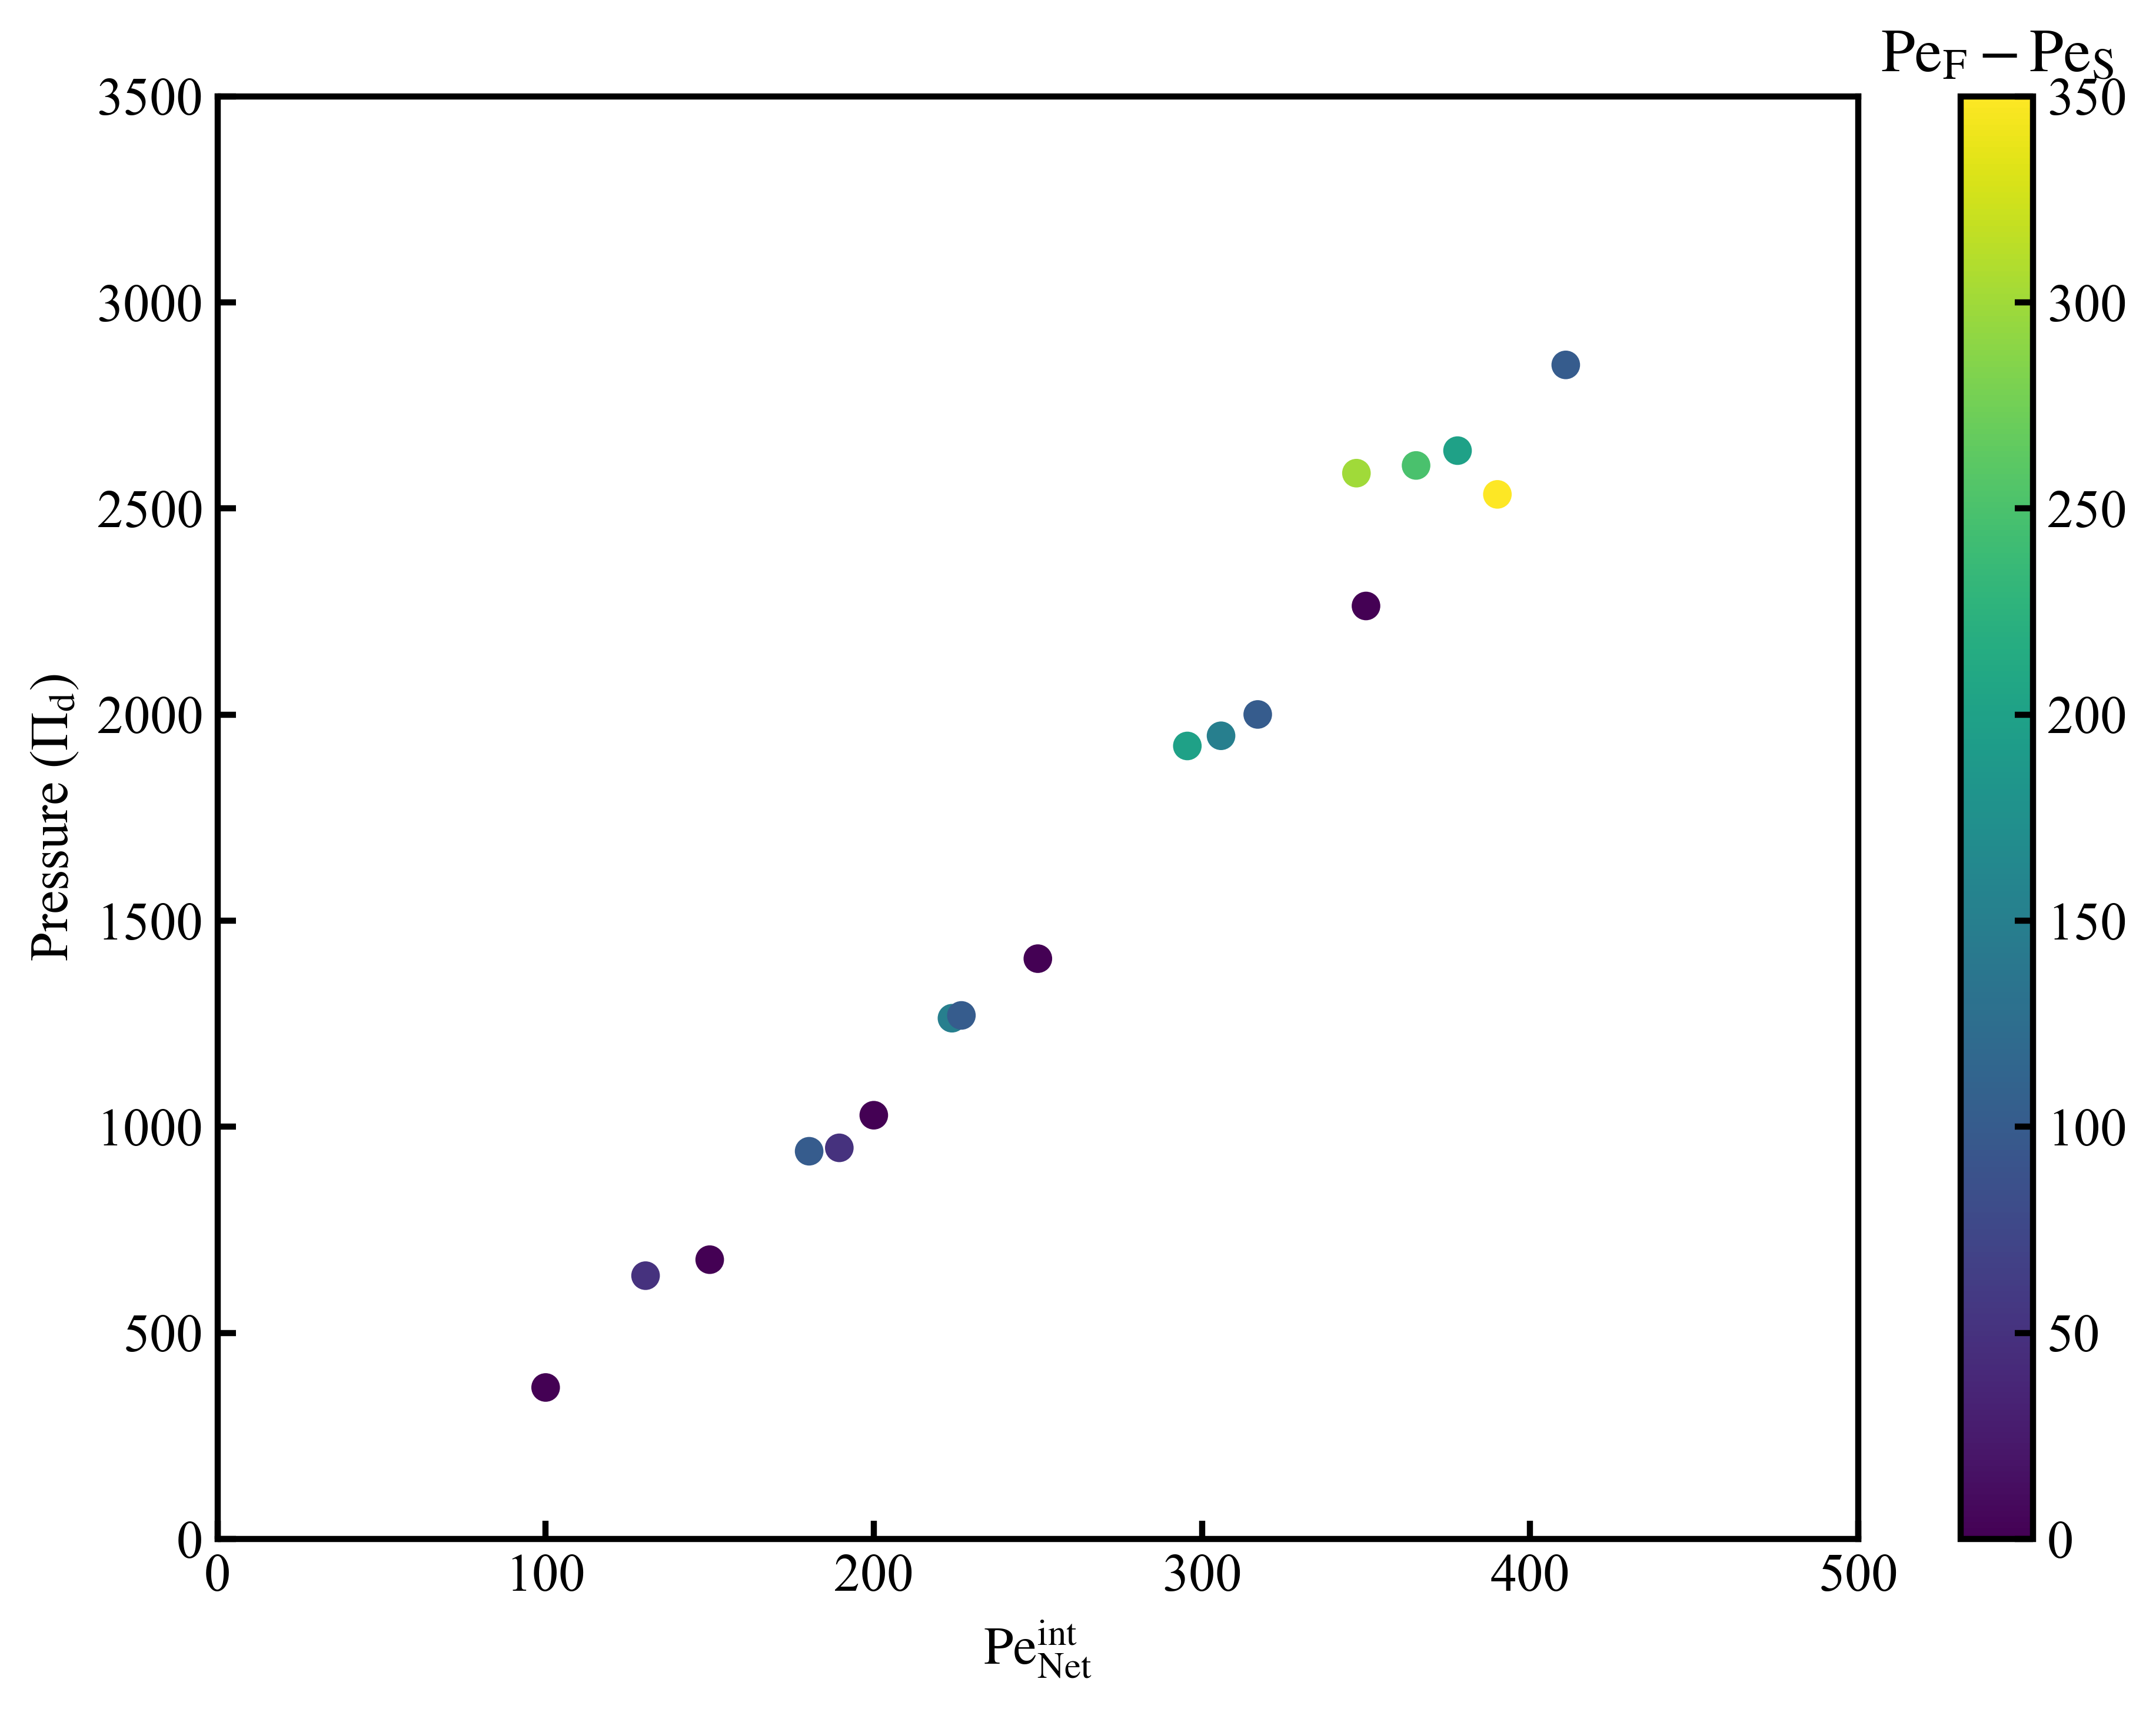

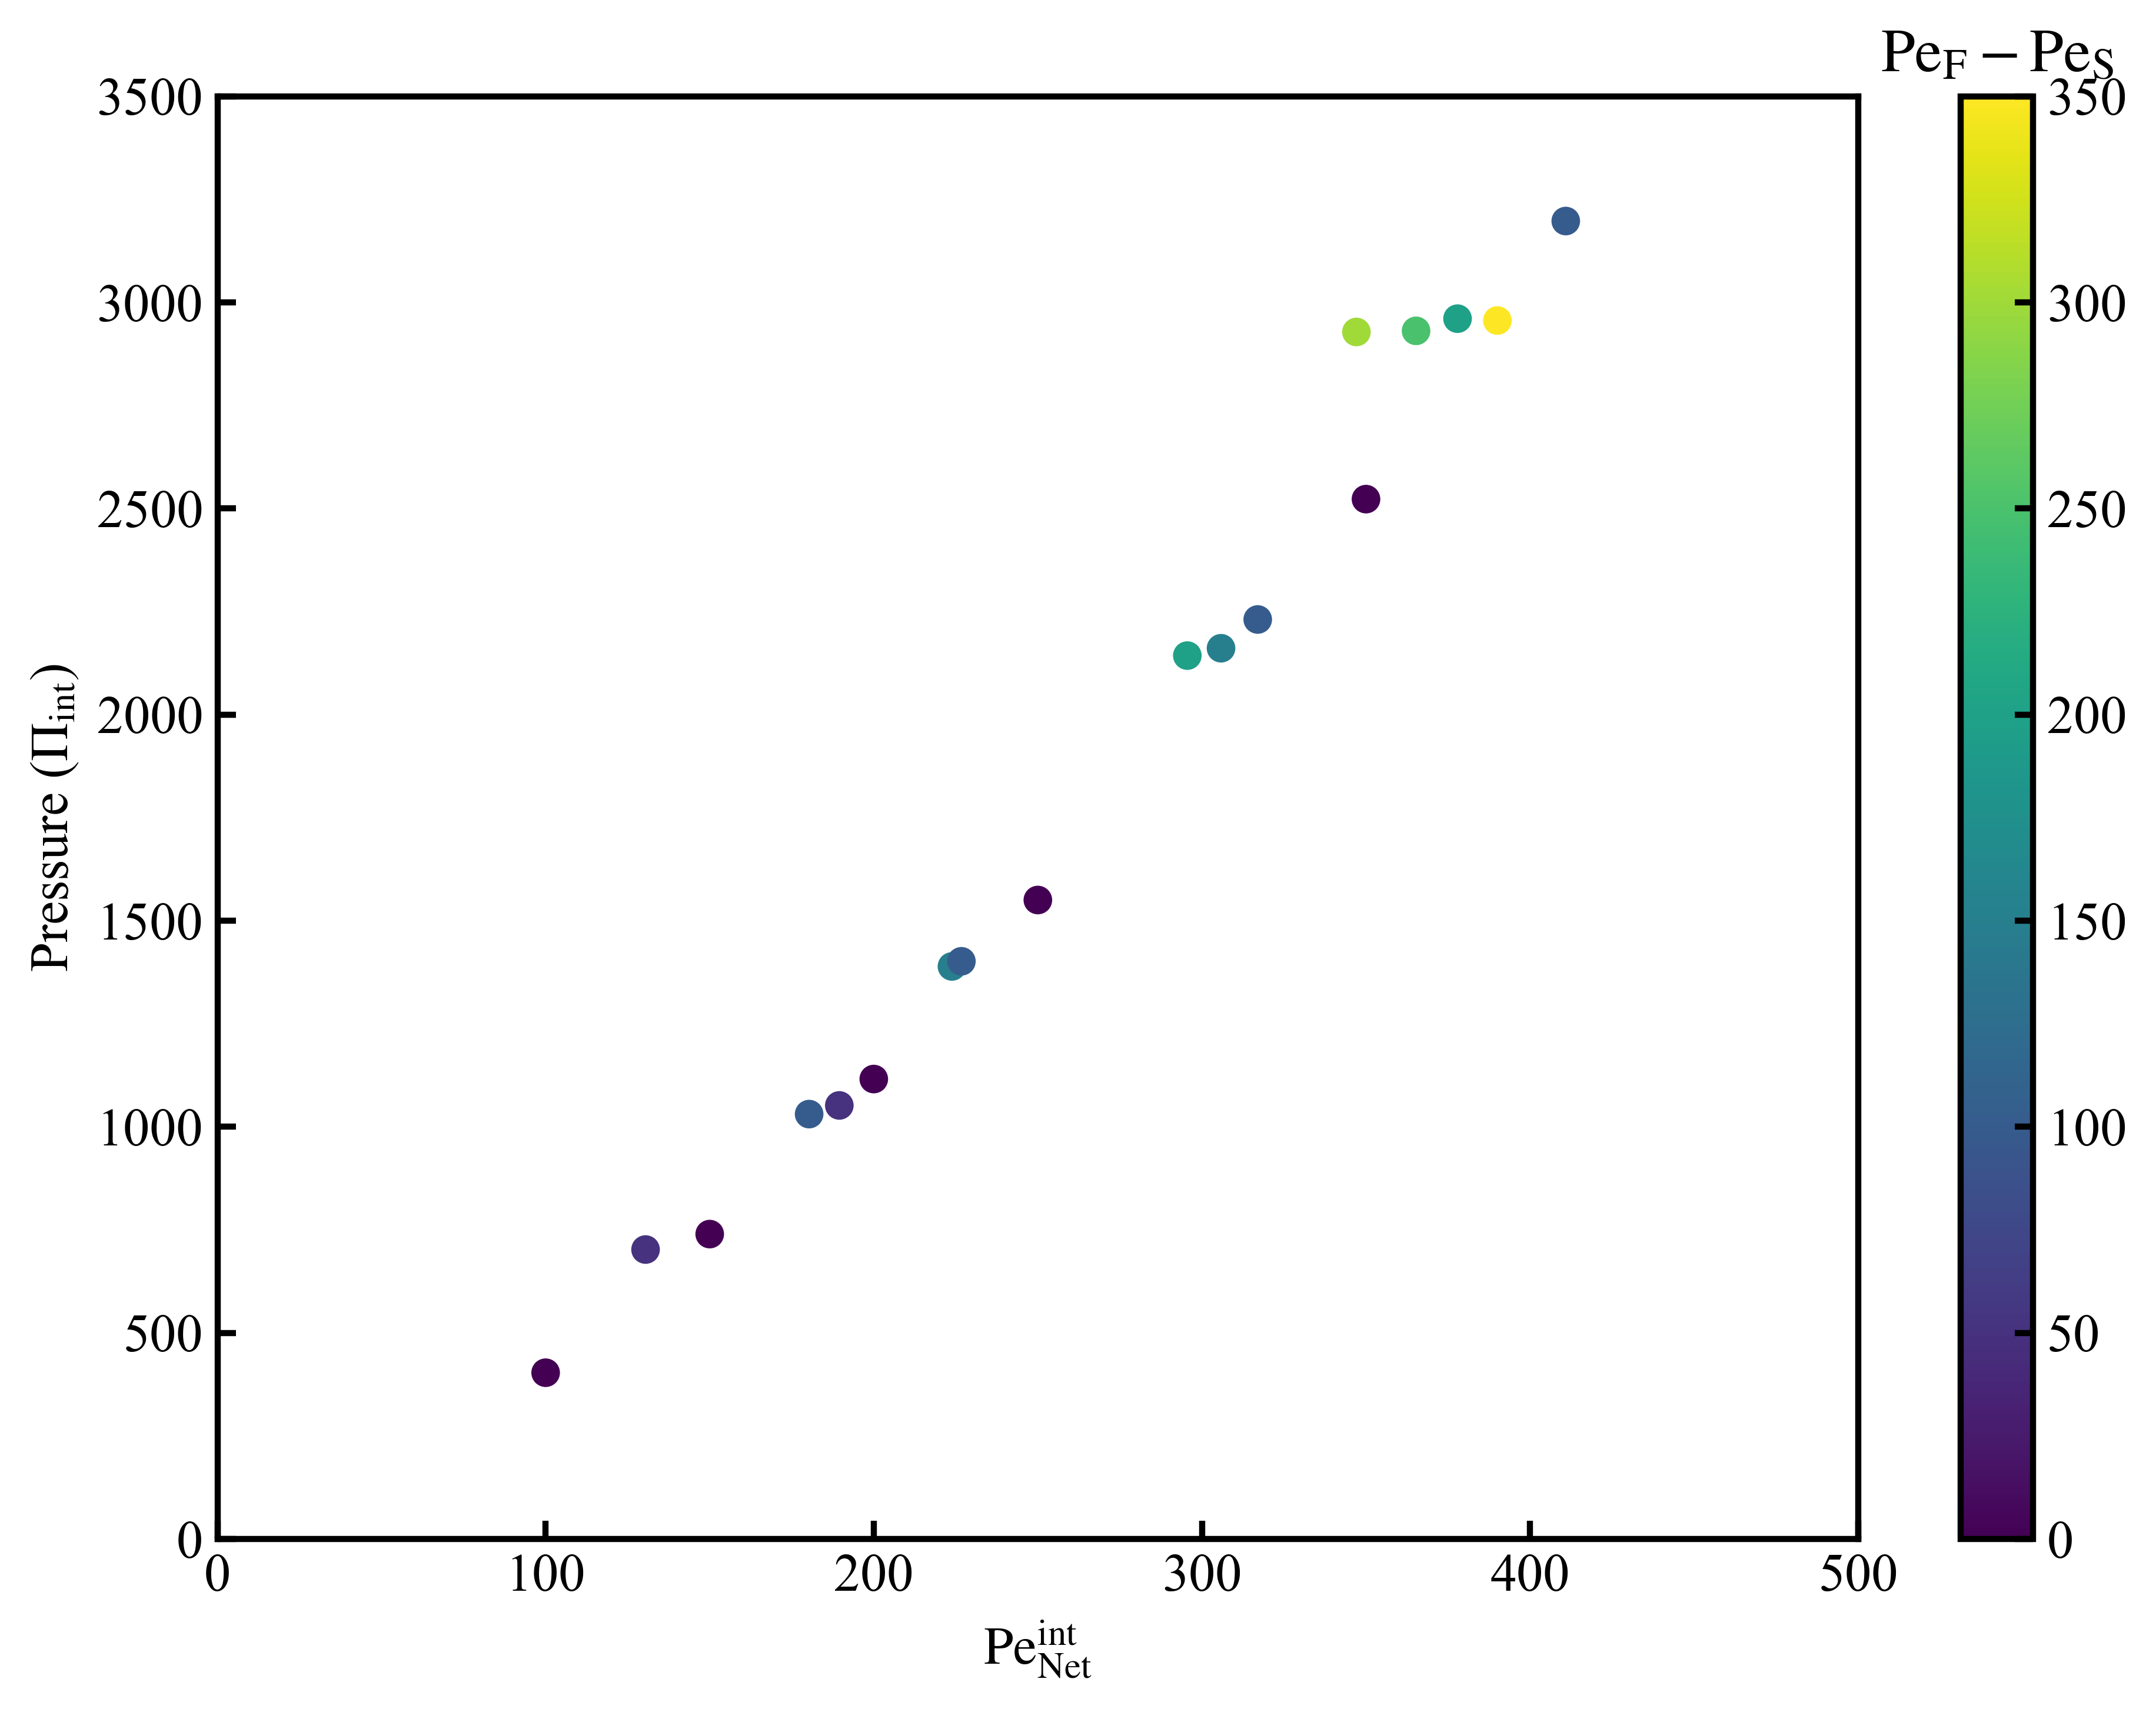

TypeError: 'AxesSubplot' object is not subscriptable

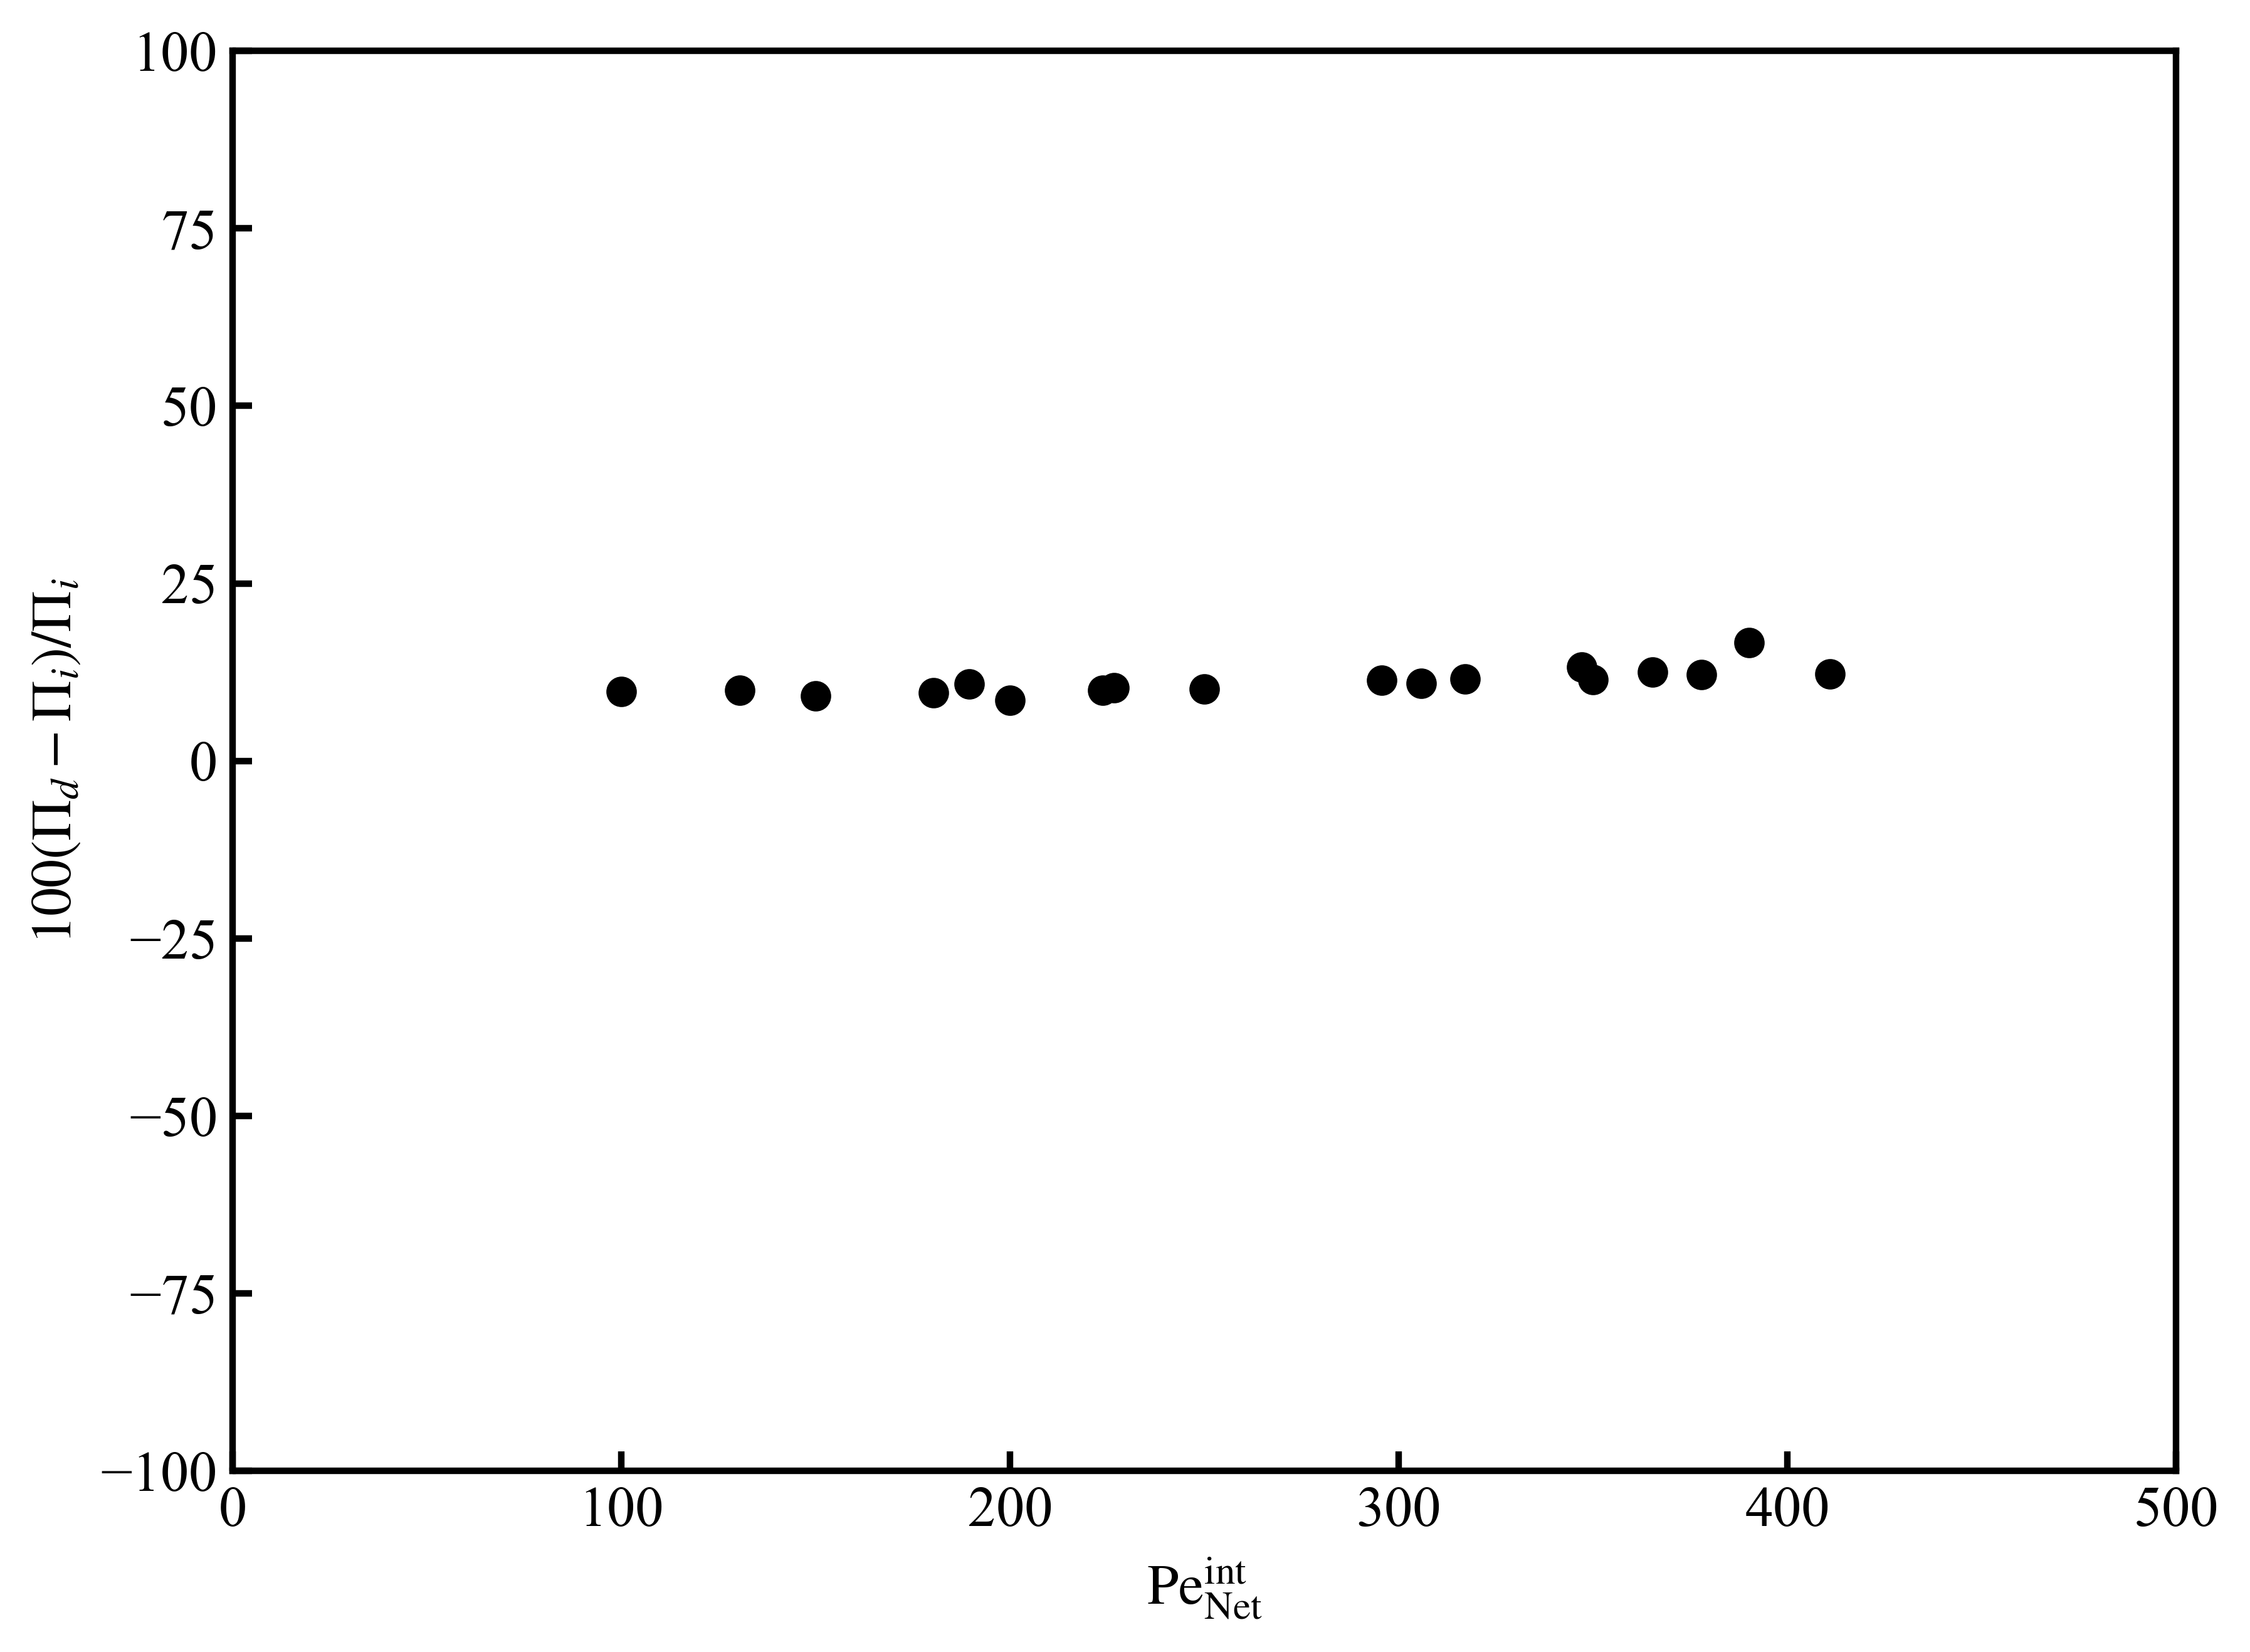

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.scatter(interpart_peNet, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(interpart_peNet, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(int_pe_net, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(int_pe_net, align_press_arr, c='red', label='aligned interface')
plt.scatter(int_pe_net, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(int_pe_net, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

import matplotlib
fig = plt.figure(figsize=(8,6))
im = plt.scatter(int_pe_net, interpart_press, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))

sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
plt.xlim(0, 500)
plt.ylim(0, 3500)
plt.ylabel(r'Pressure ($\Pi_\mathrm{d}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, align_press_arr, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
            
plt.xlim(0, 500)
plt.ylim(0, 3500)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'Pressure ($\Pi_\mathrm{int}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, ((align_press_arr-interpart_press)/interpart_press)*100, c='black')
 
plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_d - \Pi_i)/\Pi_i$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')

# Make a simulation vs theory legend
leg_three = [Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 6', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 7', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax[0].legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*3.2, frameon=False, ncol=1)
ax[0].add_artist(two_leg)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(int_pe_net, ((interpart_press-avg_bulk_theory_arr)/avg_bulk_theory_arr)*100, c=green, label='bulk')
plt.scatter(int_pe_net, ((align_press_arr-avg_int_theory_arr)/avg_int_theory_arr)*100, c=yellow, label='interface')

plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_\mathrm{sim} - \Pi_\mathrm{theory})/\Pi_\mathrm{theory}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()